In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# dataset :- https://www.kaggle.com/datasets/arjunbhasin2013/ccdata

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv('/content/drive/My Drive/Marketing_data.csv')
df

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
...      ...          ...                ...        ...               ...   
8945  C19186    28.493517           1.000000     291.12              0.00   
8946  C19187    19.183215           1.000000     300.00              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3        0.000000               NaN          0.000000      12  
4      678.334763        244.791237          0.000000      12  
...           ...               ...               ...     ...  
8945   325.594462         48.886365  

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [7]:
df.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

In [9]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

array([[<Axes: title={'center': 'BALANCE'}>,
        <Axes: title={'center': 'BALANCE_FREQUENCY'}>,
        <Axes: title={'center': 'PURCHASES'}>,
        <Axes: title={'center': 'ONEOFF_PURCHASES'}>,
        <Axes: title={'center': 'INSTALLMENTS_PURCHASES'}>,
        <Axes: title={'center': 'CASH_ADVANCE'}>,
        <Axes: title={'center': 'PURCHASES_FREQUENCY'}>,
        <Axes: title={'center': 'ONEOFF_PURCHASES_FREQUENCY'}>,
        <Axes: title={'center': 'PURCHASES_INSTALLMENTS_FREQUENCY'}>],
       [<Axes: title={'center': 'CASH_ADVANCE_FREQUENCY'}>,
        <Axes: title={'center': 'CASH_ADVANCE_TRX'}>,
        <Axes: title={'center': 'PURCHASES_TRX'}>,
        <Axes: title={'center': 'CREDIT_LIMIT'}>,
        <Axes: title={'center': 'PAYMENTS'}>,
        <Axes: title={'center': 'MINIMUM_PAYMENTS'}>,
        <Axes: title={'center': 'PRC_FULL_PAYMENT'}>,
        <Axes: title={'center': 'TENURE'}>, <Axes: >]], dtype=object)

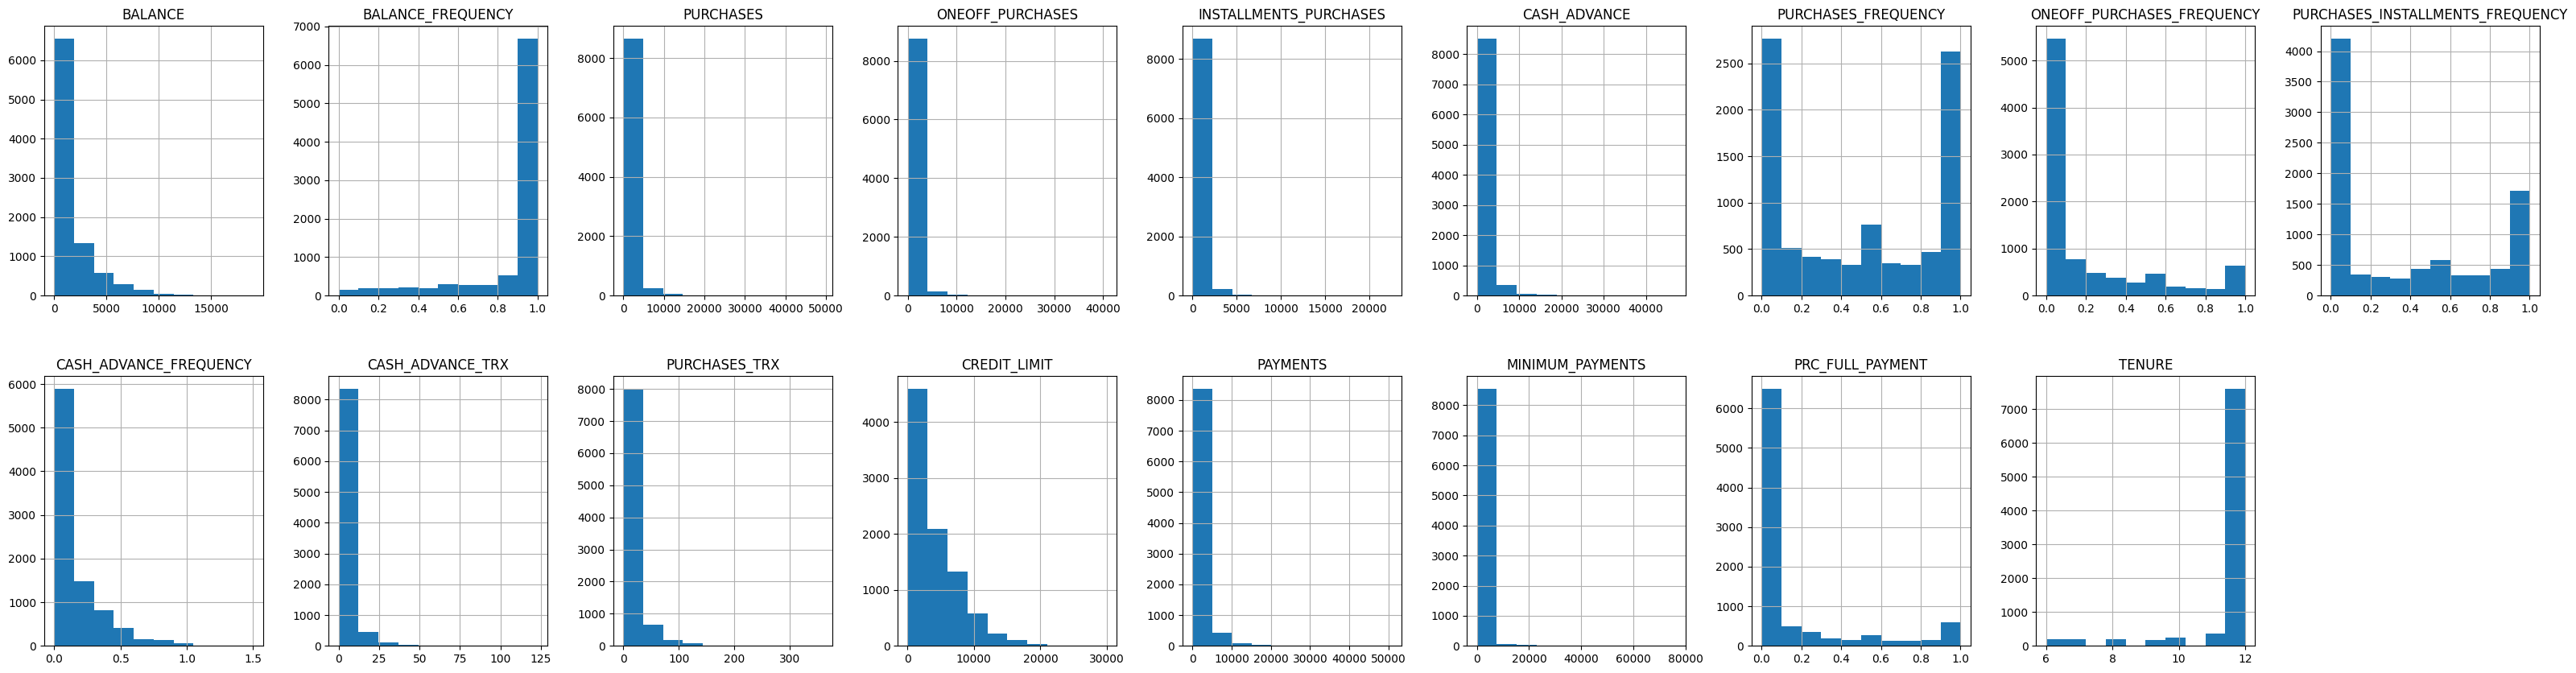

In [10]:
df.hist(layout=(2,9), figsize=(40,10))

In [11]:
df[df.ONEOFF_PURCHASES==df.ONEOFF_PURCHASES.max()]

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
550  C10574  11547.52001                1.0   49039.57          40761.25   

     INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
550                 8278.32    558.166886                  1.0   

     ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
550                         1.0                          0.916667   

     CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
550                0.083333                 1            101       22500.0   

        PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
550  46930.59824       2974.069421              0.25      12

In [12]:
df[df.CASH_ADVANCE==df.CASH_ADVANCE.max()]

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
2159  C12226  10905.05381                1.0     431.93             133.5   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
2159                  298.43   47137.21176             0.583333   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
2159                        0.25                               0.5   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
2159                     1.0               123             21       19600.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
2159  39048.59762       5394.173671               0.0      12

VISUALIZING THE DATA AND EXPLORING

In [13]:
df[df.CREDIT_LIMIT.isna()]

CUST_ID    BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
5203  C15349  18.400472           0.166667        0.0               0.0   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
5203                     0.0    186.853063                  0.0   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
5203                         0.0                               0.0   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
5203                0.166667                 1              0           NaN   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
5203  9.040017         14.418723               0.0       6

In [14]:
# setting the credit limit to mean.
df.CREDIT_LIMIT.fillna(df.CREDIT_LIMIT.mean(), inplace=True)

In [15]:
df[df.MINIMUM_PAYMENTS.isna()]

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
3     C10004  1666.670542           0.636364    1499.00           1499.00   
45    C10047  2242.311686           1.000000     437.00             97.00   
47    C10049  3910.111237           1.000000       0.00              0.00   
54    C10056     6.660517           0.636364     310.00              0.00   
55    C10057  1311.995984           1.000000    1283.90           1283.90   
...      ...          ...                ...        ...               ...   
8919  C19160    14.524779           0.333333     152.00            152.00   
8929  C19170   371.527312           0.333333       0.00              0.00   
8935  C19176   183.817004           1.000000     465.90              0.00   
8944  C19185   193.571722           0.833333    1012.73           1012.73   
8946  C19187    19.183215           1.000000     300.00              0.00   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
3                        0.0    205.788017             0.083333   
45                     340.0    184.648692             0.333333   
47                       0.0   1980.873201             0.000000   
54                     310.0      0.000000             0.666667   
55                       0.0      0.000000             0.250000   
...                      ...           ...                  ...   
8919                     0.0      0.000000             0.333333   
8929                     0.0   1465.407927             0.000000   
8935                   465.9      0.000000             1.000000   
8944                     0.0      0.000000             0.333333   
8946                   300.0      0.000000             1.000000   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
3                       0.083333                          0.000000   
45                      0.083333                          0.333333   
47                      0.000000                          0.000000   
54                      0.000000                          0.666667   
55                      0.250000                          0.000000   
...                          ...                               ...   
8919                    0.333333                          0.000000   
8929                    0.000000                          0.000000   
8935                    0.000000                          0.833333   
8944                    0.333333                          0.000000   
8946                    0.000000                          0.833333   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
3                   0.083333                 1              1        7500.0   
45                  0.166667                 2              5        2400.0   
47                  0.500000                 7              0        4200.0   
54                  0.000000                 0              8        1000.0   
55                  0.000000                 0              6        6000.0   
...                      ...               ...            ...           ...   
8919                0.000000                 0              2        1500.0   
8929                0.166667                 5              0        1500.0   
8935                0.000000                 0              6        1500.0   
8944                0.000000                 0              2        4000.0   
8946                0.000000                 0              6        1000.0   

        PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
3       0.000000               NaN               0.0      12  
45      0.000000               NaN               0.0      12  
47      0.000000               NaN               0.0      12  
54    417.016763               NaN               0.0      12  
55      0.000000               NaN               0.0      12  
...          ...               ...               ...     ...  
8919    0.000000               NaN          

In [18]:
# setting the minimum payment to zero for those whose payment is 0...
df.loc[(df.MINIMUM_PAYMENTS.isnull()==True) & (df.PAYMENTS==0), 'MINIMUM_PAYMENTS'] = 0

In [19]:
df.MINIMUM_PAYMENTS.fillna(df.MINIMUM_PAYMENTS.mean(), inplace=True)

In [20]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [ ]:
# Now we see..no null values

In [21]:
df.duplicated().sum()

0

In [22]:
df.drop('CUST_ID', inplace=True, axis=1)

In [23]:
len(df.columns)

17

In [24]:
features = df.columns
features

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

<ipython-input-25-34d2029ae6a7>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df.columns[i]], hist_kws={'color':'g'}, kde_kws={'color':'b', 'lw':2, 'label':'KDE'})
<ipython-input-25-34d2029ae6a7>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df.columns[i]], hist_kws={'color':'g'}, kd

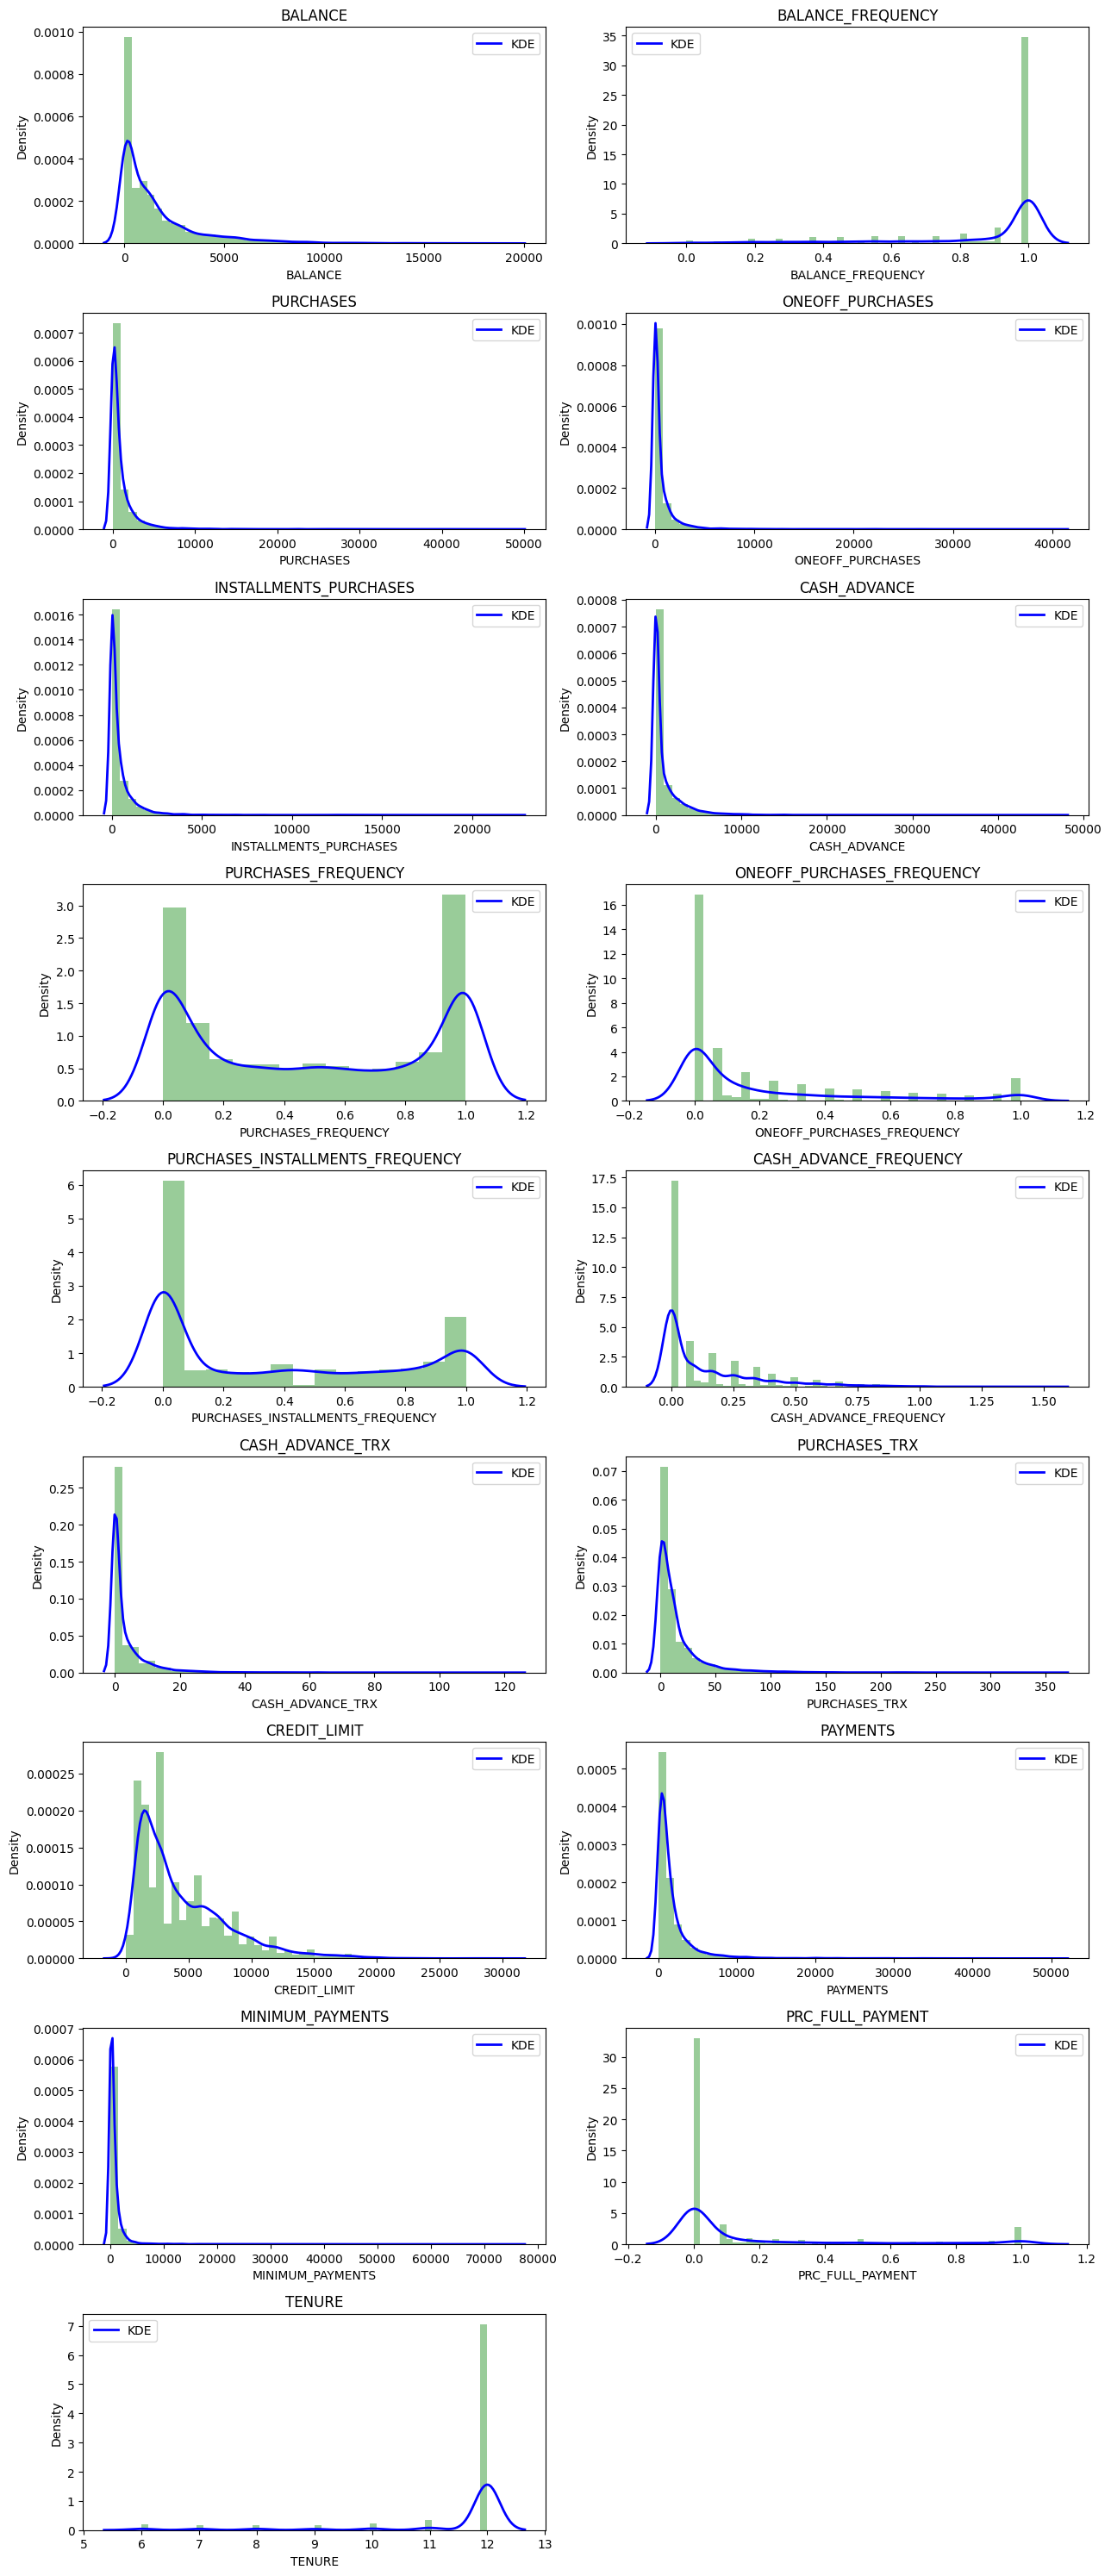

In [25]:
plt.figure(figsize=(13,30))
for i in range(len(df.columns)):
  plt.subplot(len(df.columns)//2+1,2,i+1)
  sns.distplot(df[df.columns[i]], hist_kws={'color':'g'}, kde_kws={'color':'b', 'lw':2, 'label':'KDE'})
  plt.title(df.columns[i])
  plt.legend()
plt.tight_layout()

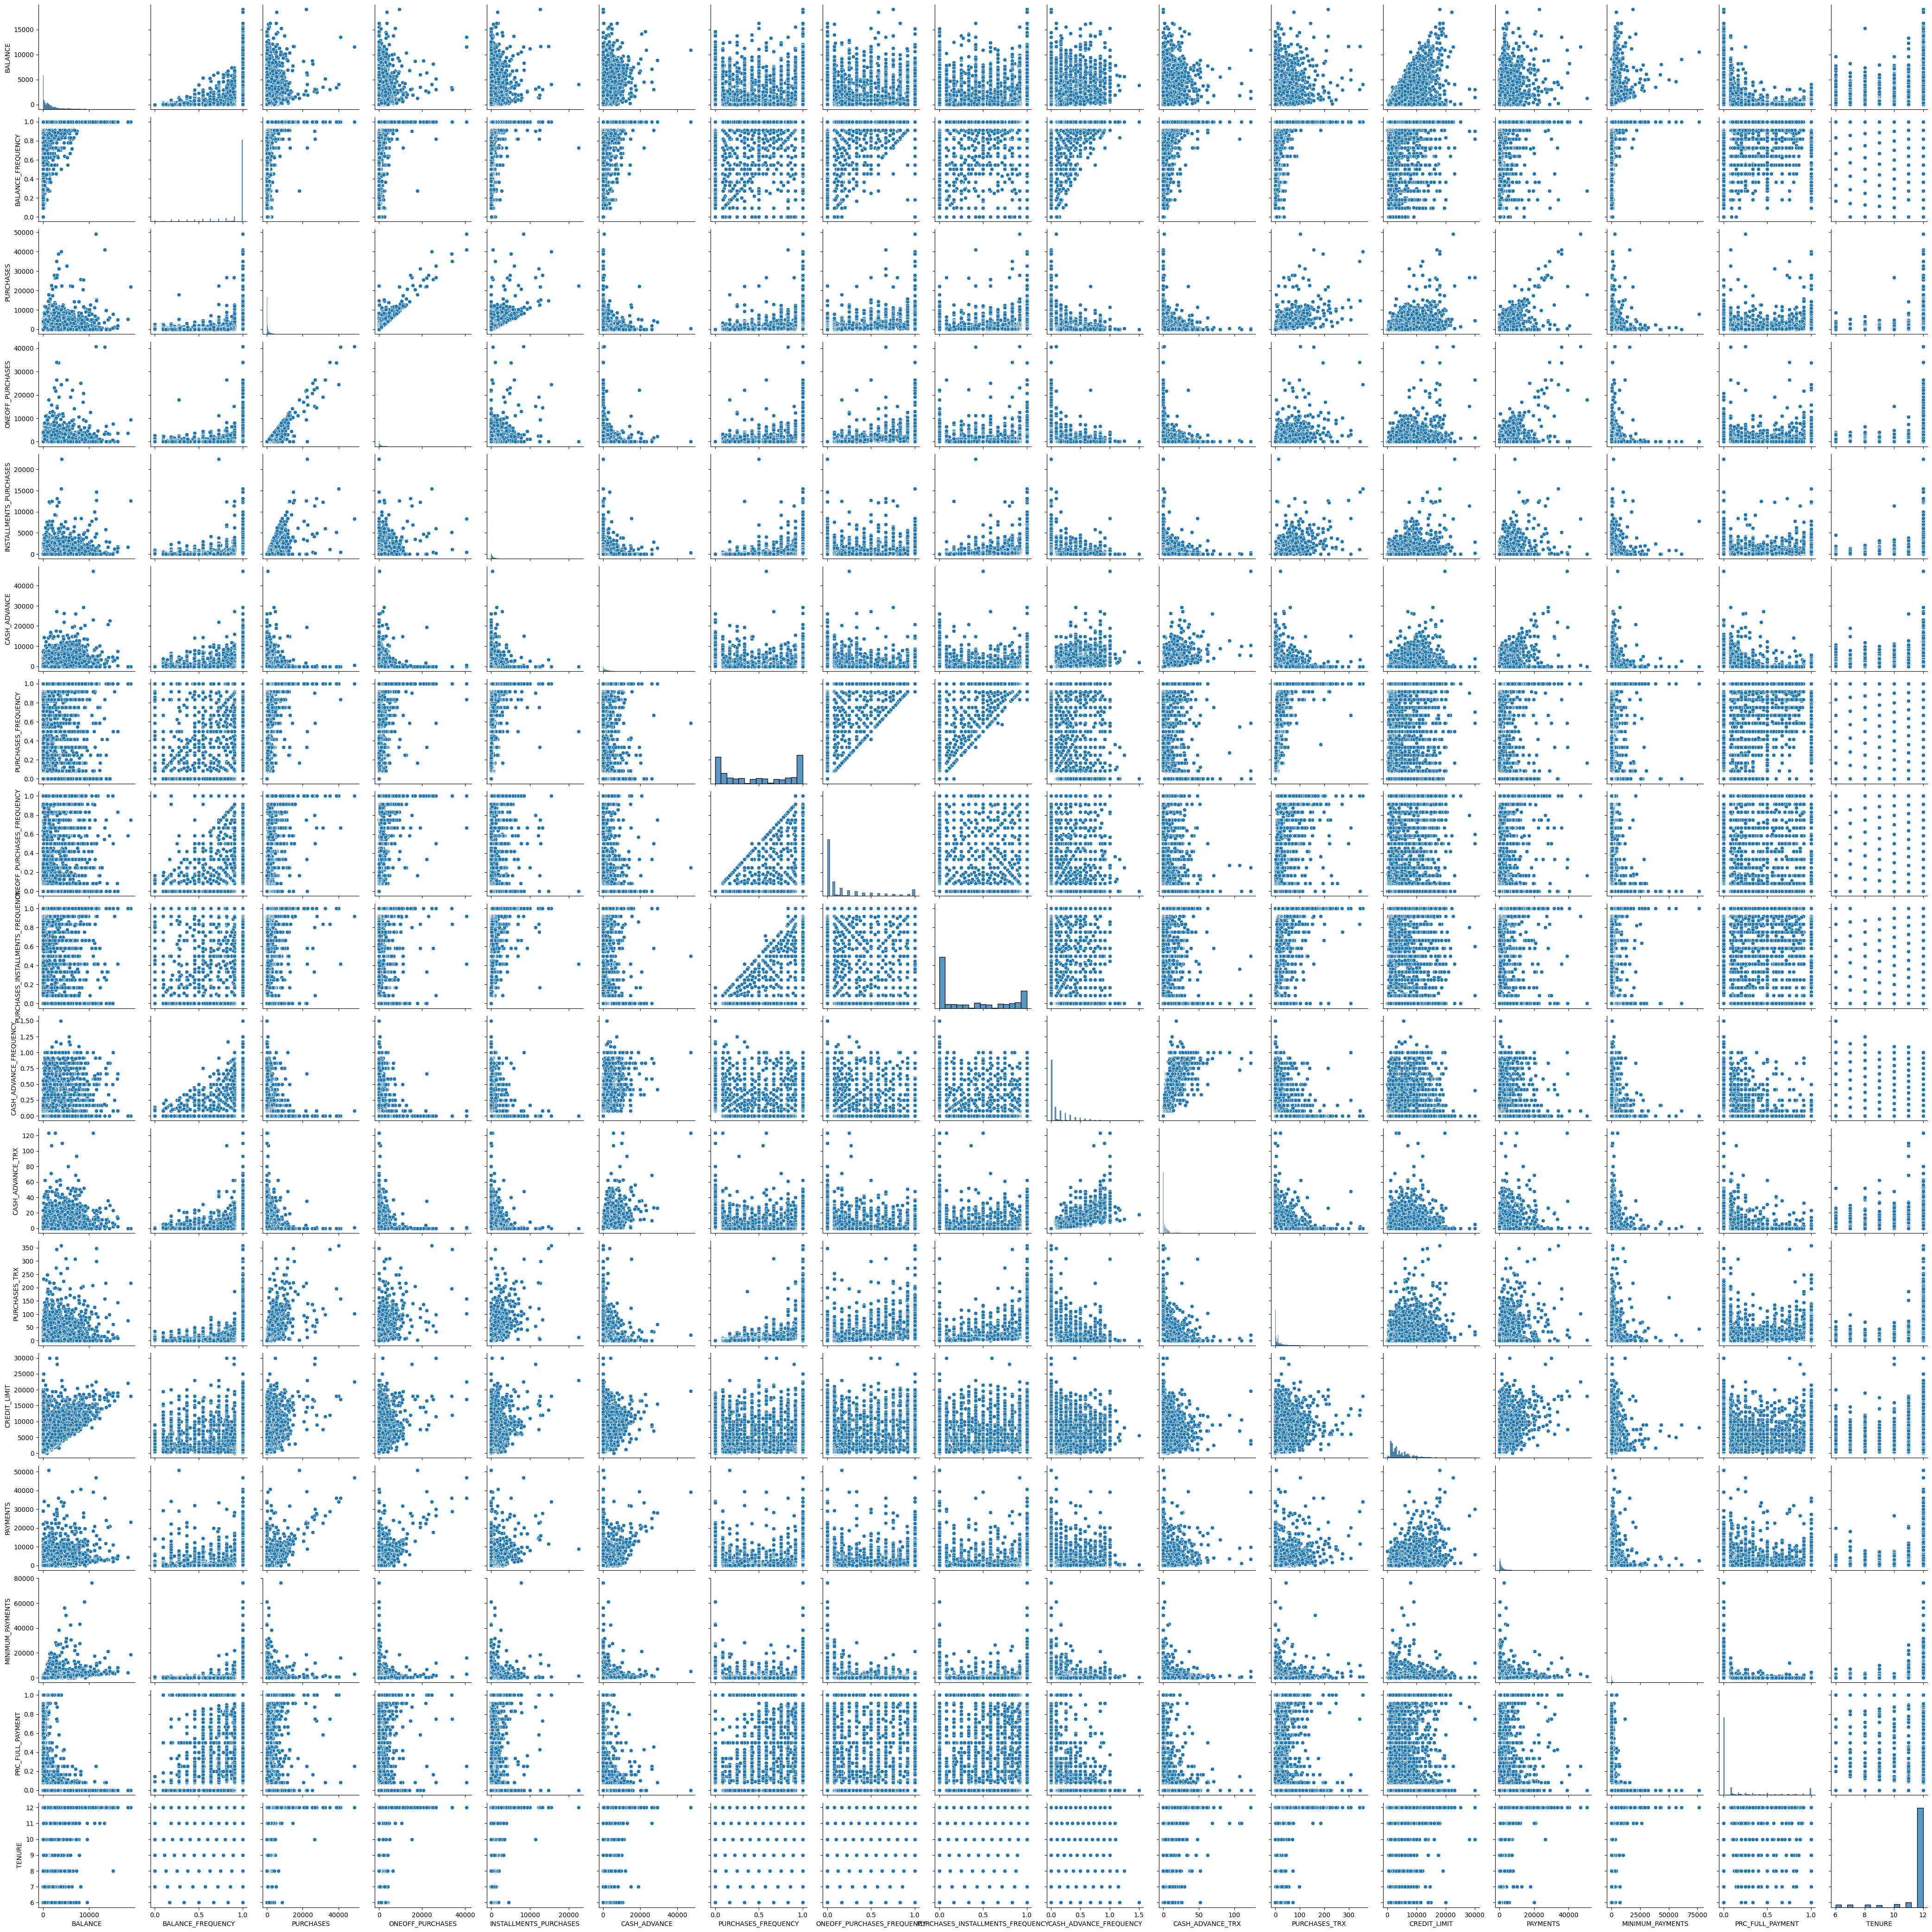

In [26]:
sns.pairplot(df)

<Axes: >

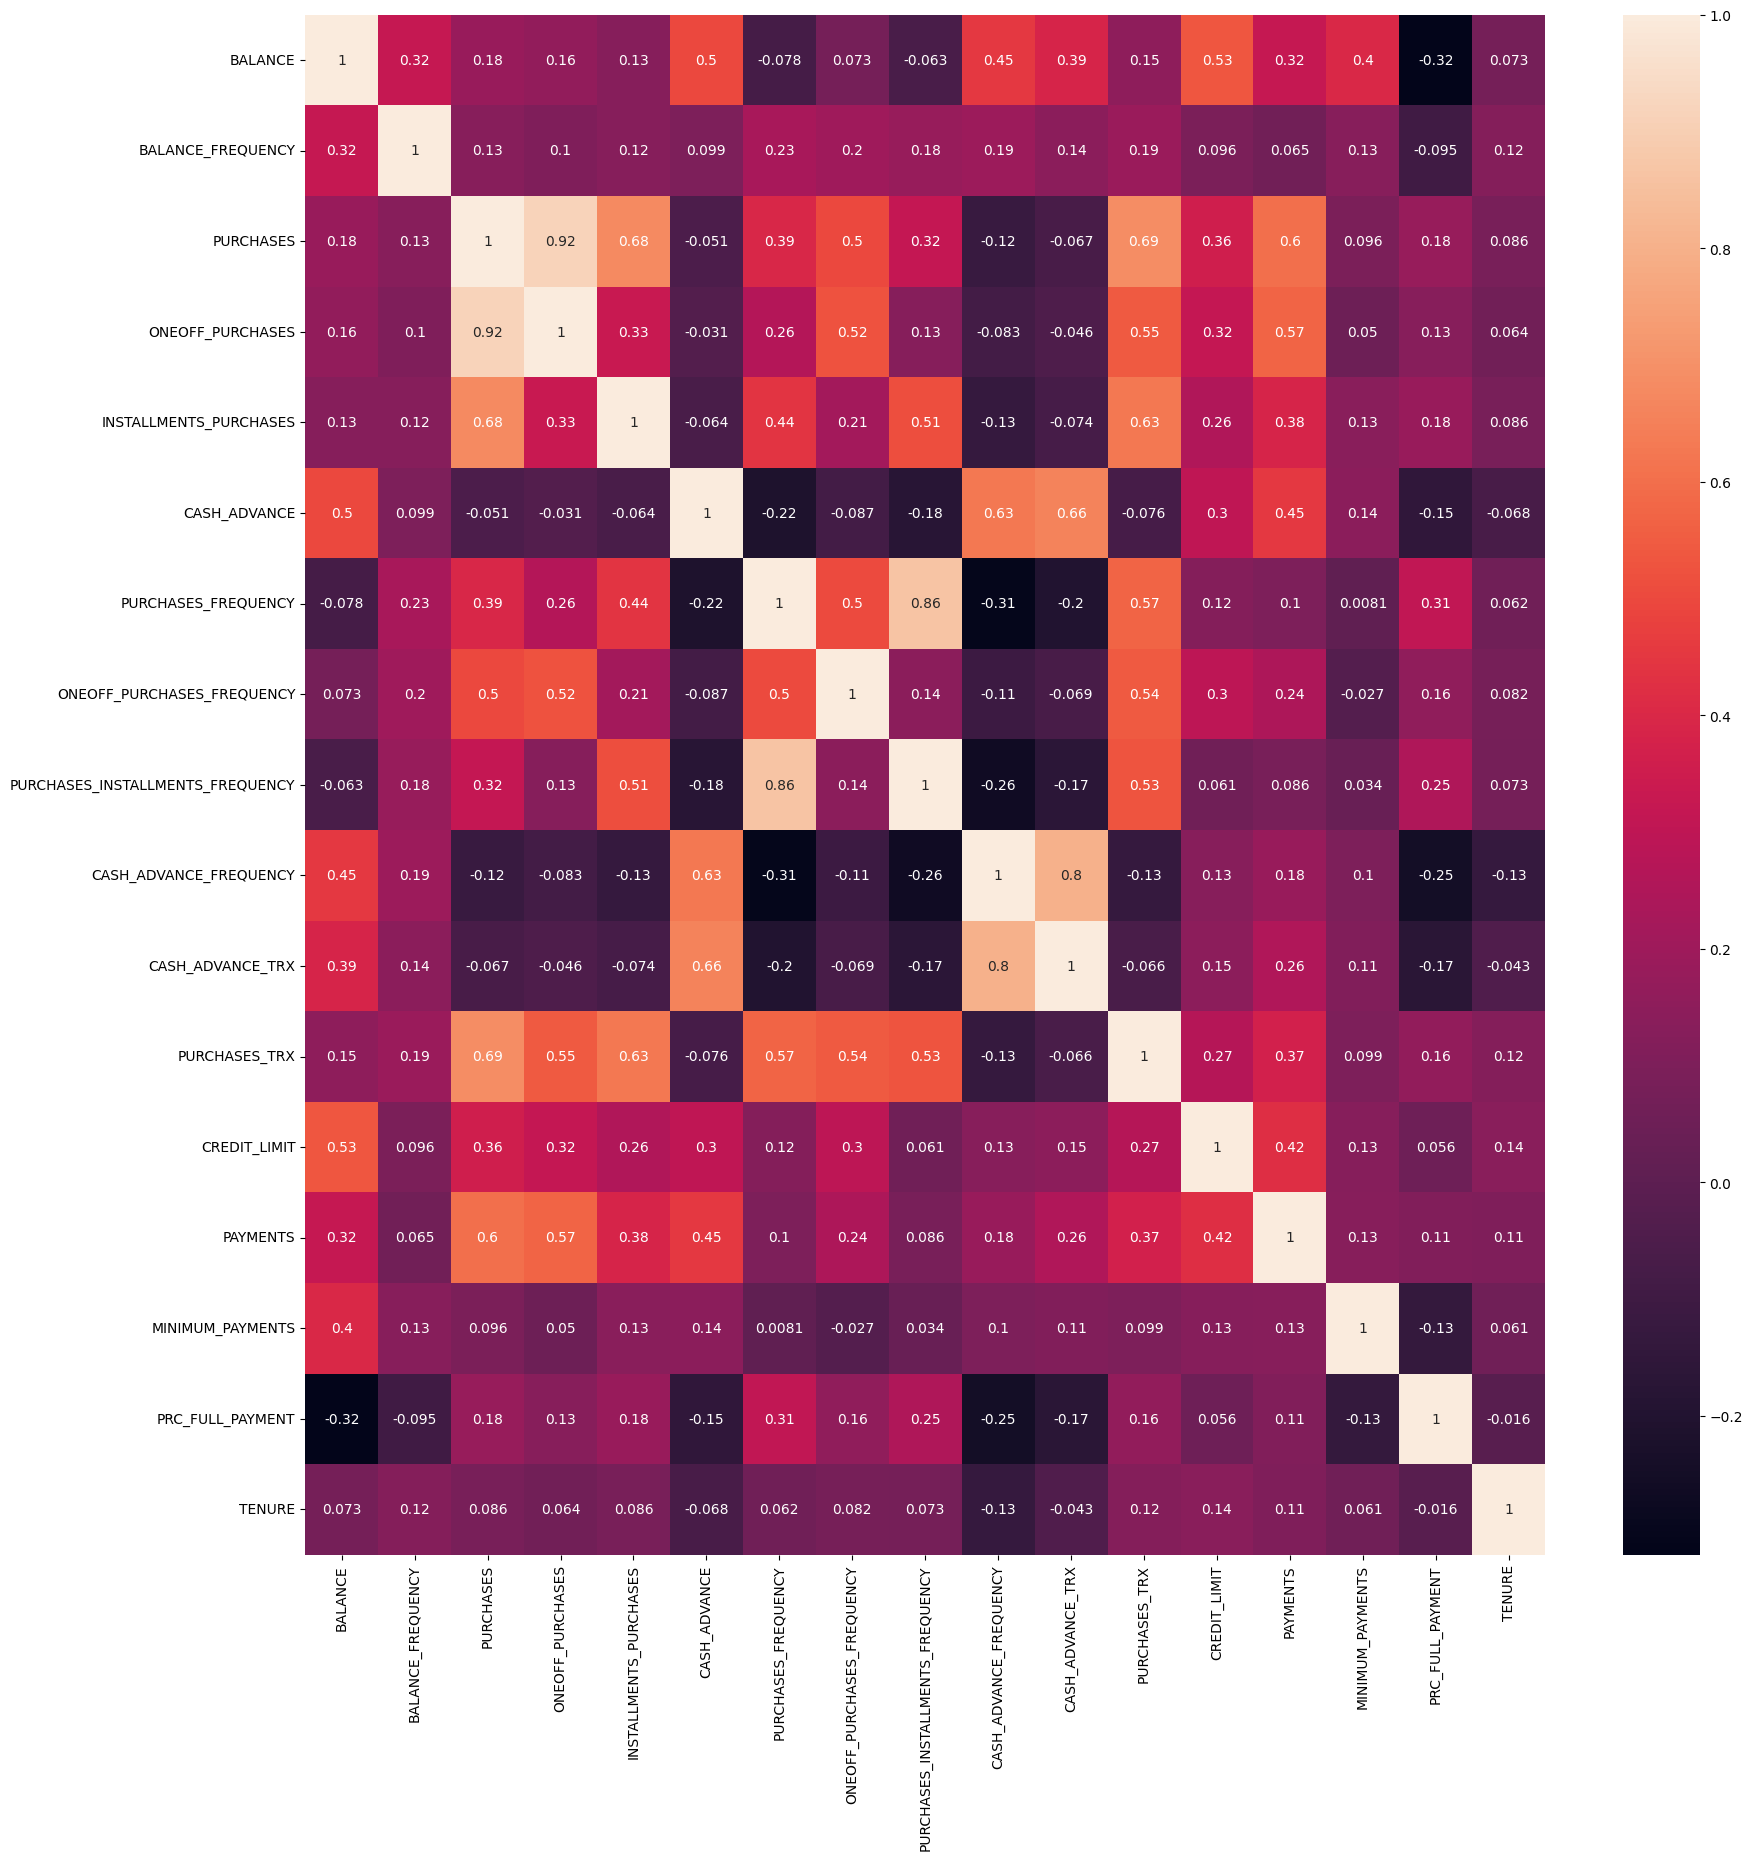

In [28]:
correlations = df.corr()
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations, annot = True)

Finding Number of clusters using "Elbow Method"

In [29]:
scaler = StandardScaler()
normalized_df = scaler.fit_transform(df)
normalized_df

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.30040327,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.09915834,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.09147338,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.32485738,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.3362779 ,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.32234282,
        -0.52555097, -4.12276757]])

In [30]:
normalized_df.shape

(8950, 17)

In [31]:
wcss_values = []
for i in range(1,20):
  kmeans = KMeans(n_clusters=i, init='k-means++')
  kmeans.fit(normalized_df)
  wcss_values.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

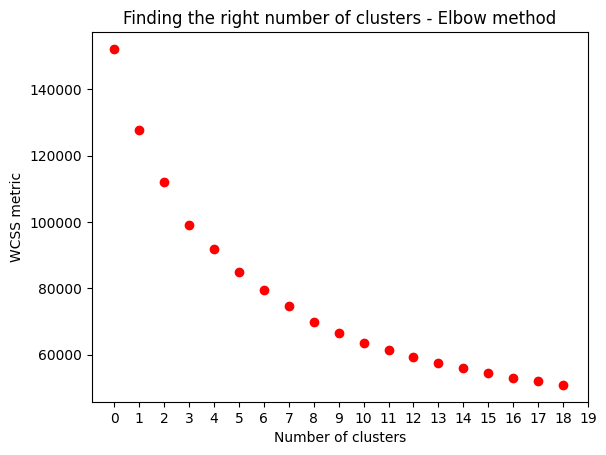

In [32]:
plt.plot(wcss_values,'ro')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS metric')
plt.title('Finding the right number of clusters - Elbow method')
plt.xticks(ticks=range(0,20))
plt.show()

In [33]:
# using the above graph, lets pick n=7....which is 8, since scale starts from 0.

APPLYING K-MEANS METHOD

In [51]:
kmeans=KMeans(8)
kmeans.fit(normalized_df)
kmeans.cluster_centers_.shape

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(8, 17)

In [52]:
# 8 centroids with 17 coordinates corresponding to each features of the dataset
cluster_centers = pd.DataFrame(data=kmeans.cluster_centers_, columns=[df.columns])

In [53]:
labels = kmeans.labels_
labels

array([3, 0, 6, ..., 4, 4, 4], dtype=int32)

In [37]:
set(labels)

{0, 1, 2, 3, 4, 5, 6, 7}

In [39]:
labels.shape

(8950,)

In [40]:
df_with_centroids = pd.concat([df, pd.DataFrame({'centroid':labels})], axis=1)
df_with_centroids

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3     1666.670542           0.636364    1499.00           1499.00   
4      817.714335           1.000000      16.00             16.00   
...           ...                ...        ...               ...   
8945    28.493517           1.000000     291.12              0.00   
8946    19.183215           1.000000     300.00              0.00   
8947    23.398673           0.833333     144.40              0.00   
8948    13.457564           0.833333       0.00              0.00   
8949   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  centroid  
0      201.802084        139.509787          0.000000      12         3  
1     4103.032597       1072.340217          0.222222      12         1  
2      622.066742        627.284787          0.000000      12         2  
3        0.000000          0.000000          0.000000      12         3  
4      678.334763        244.791237          0.000000      12         3  
...           ...               ...               ...     ...       ...  
8945   325.594462         48.886365          0.500000       6       

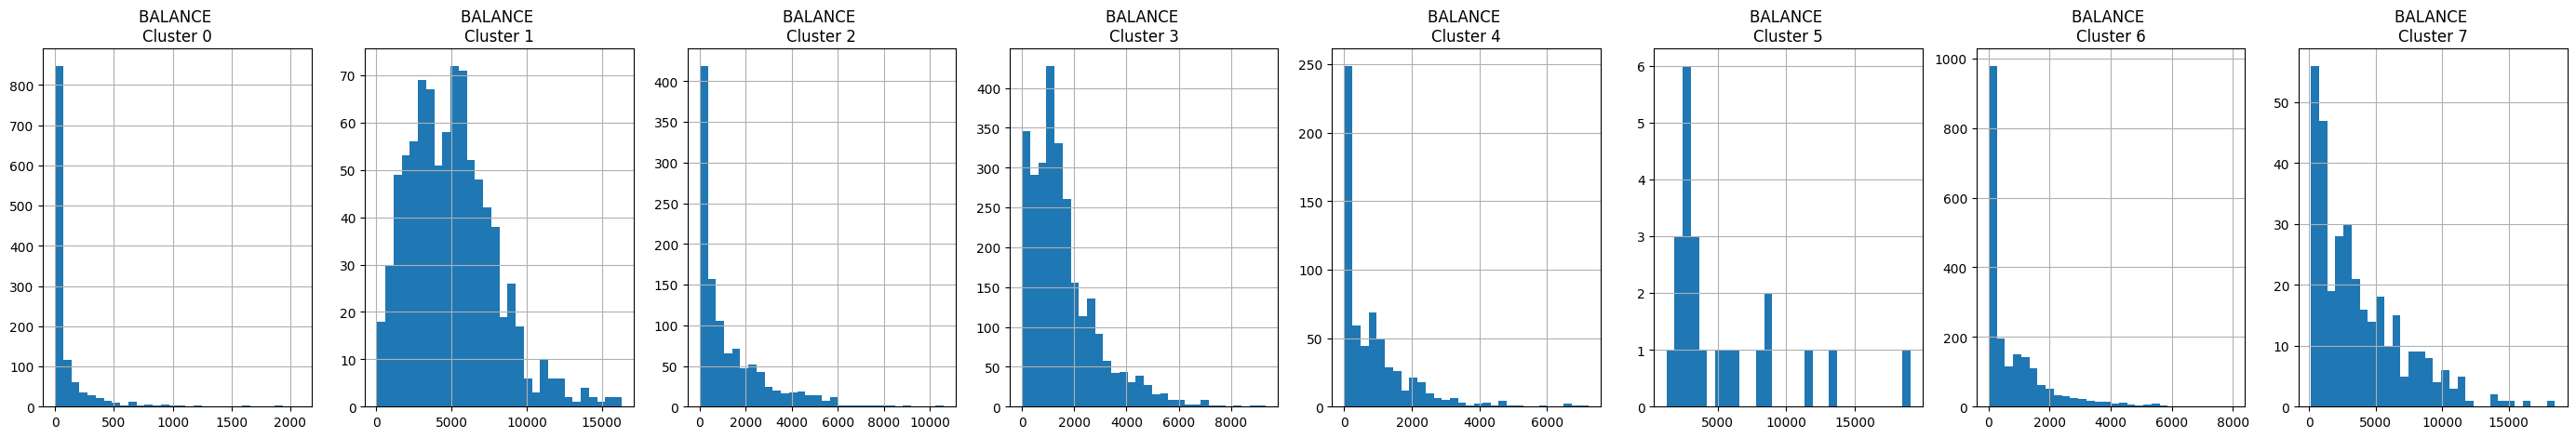

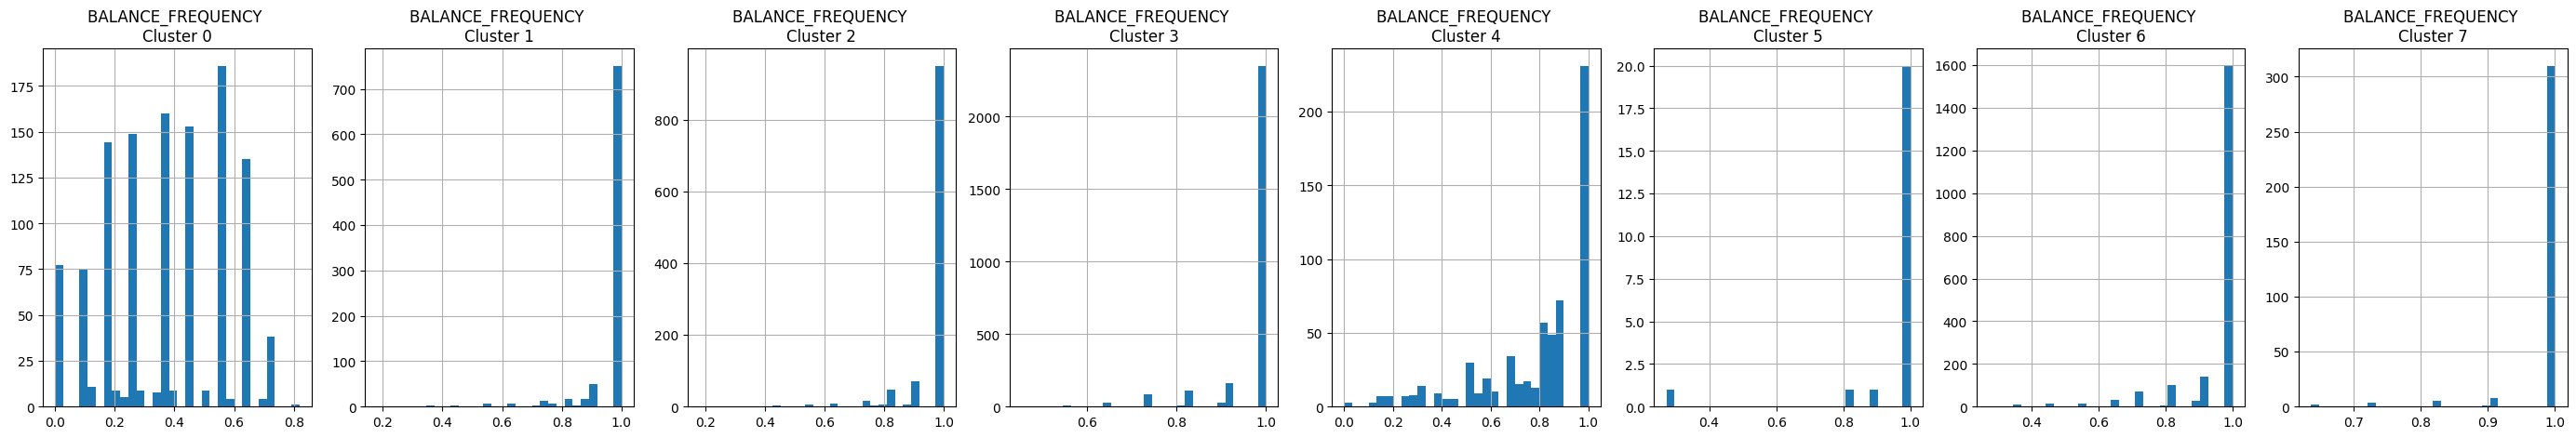

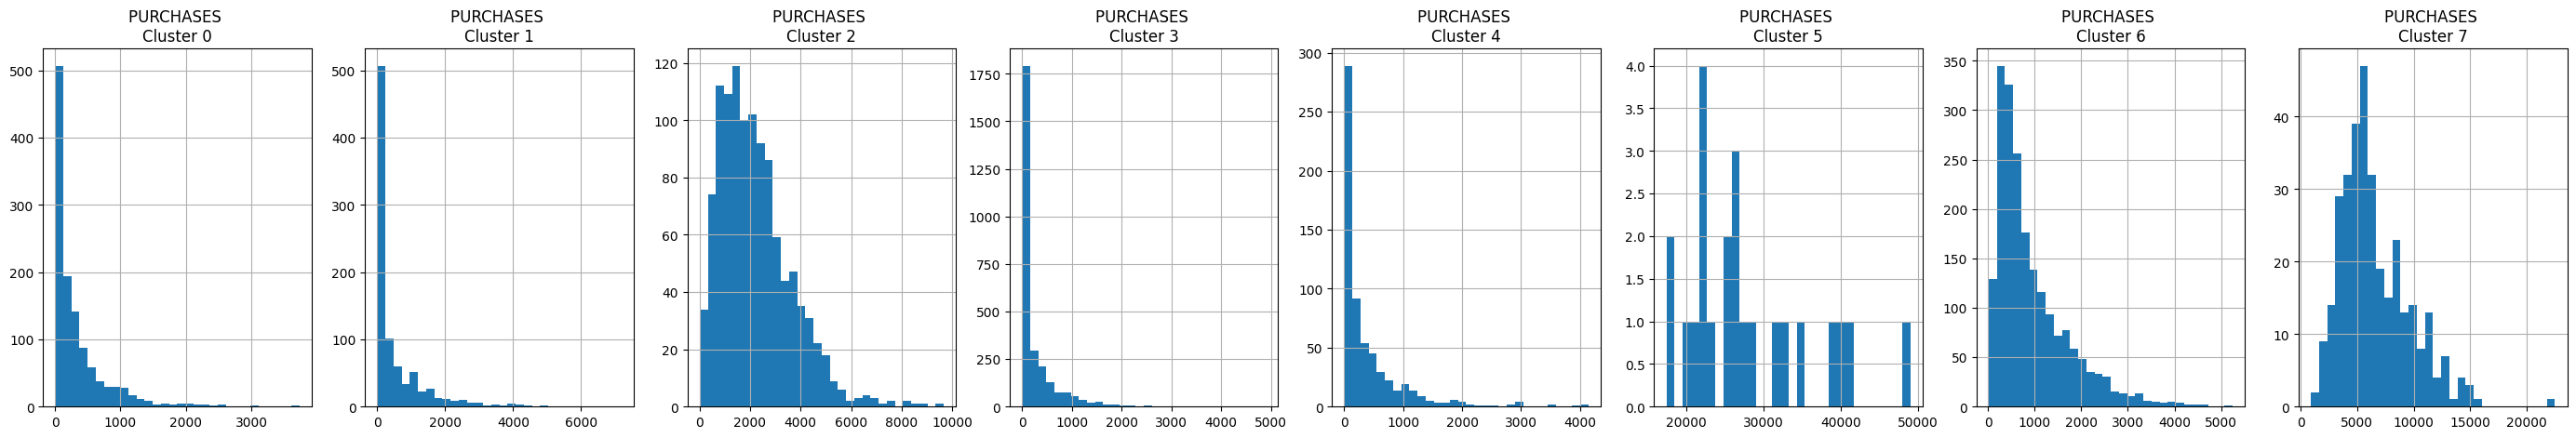

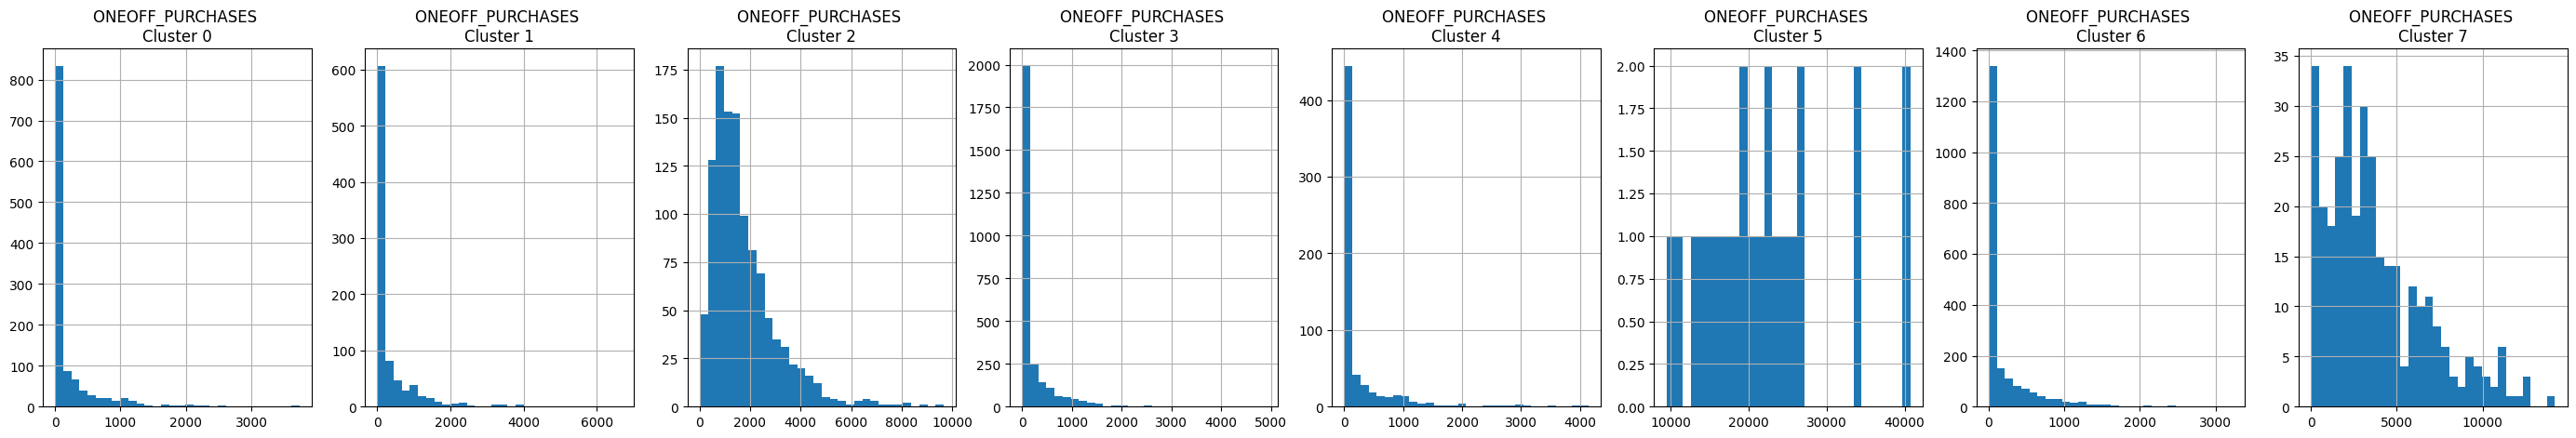

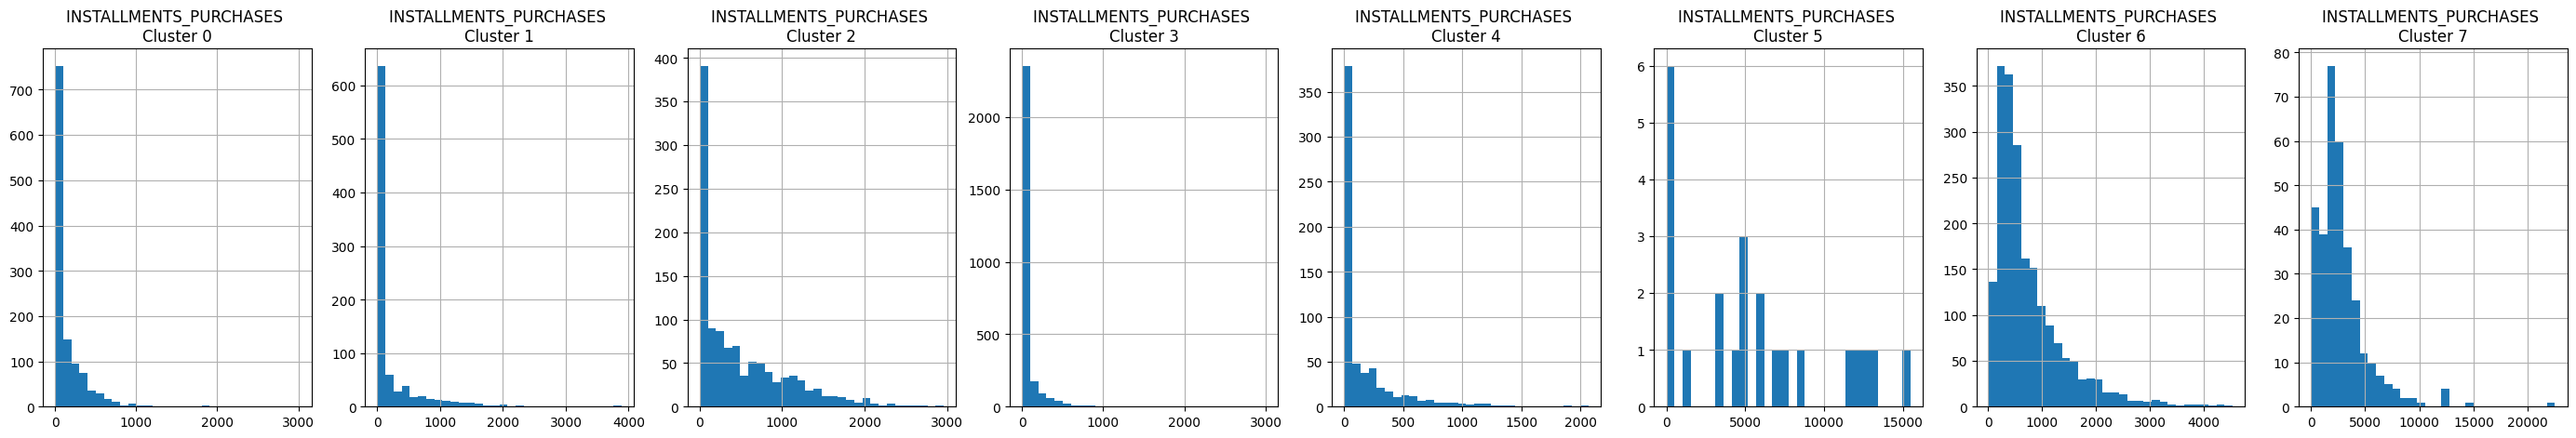

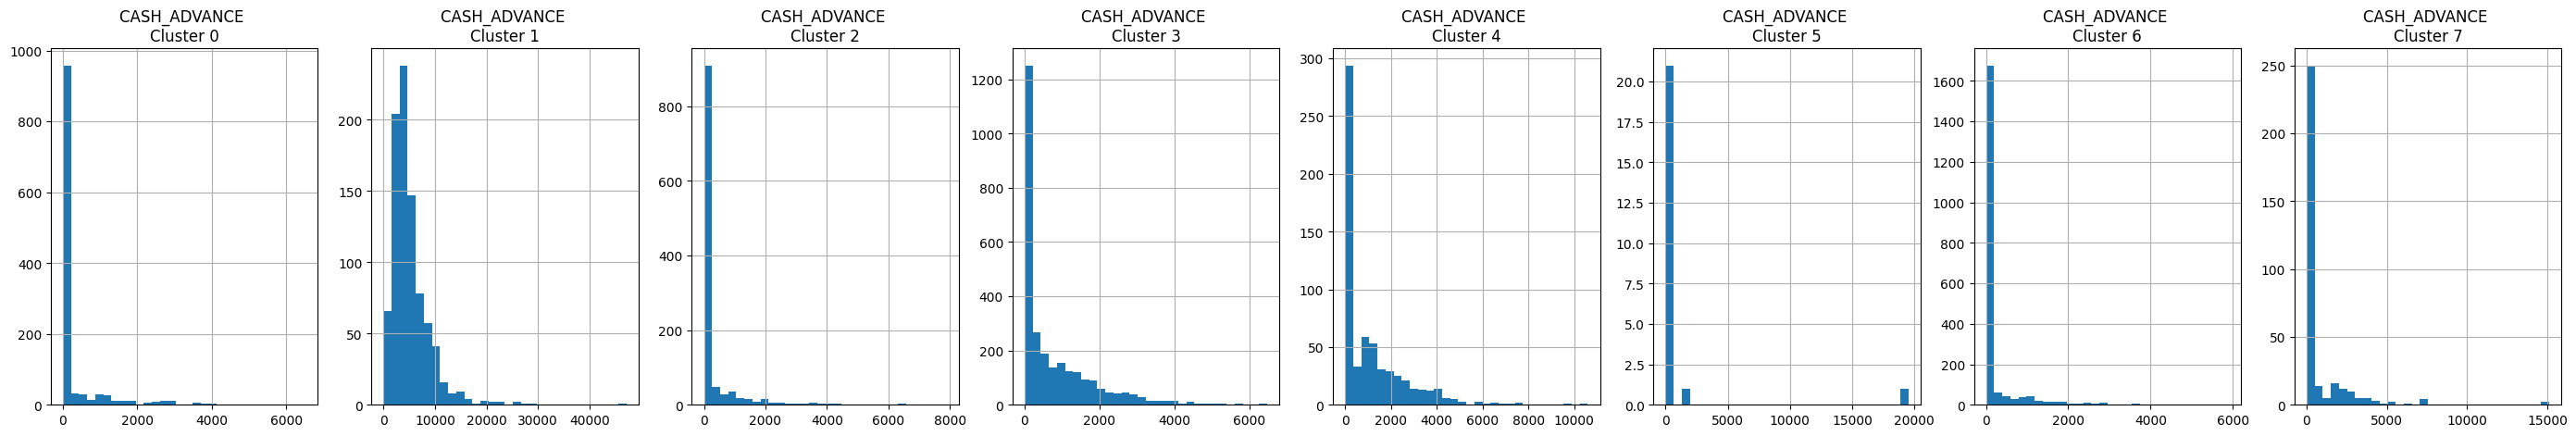

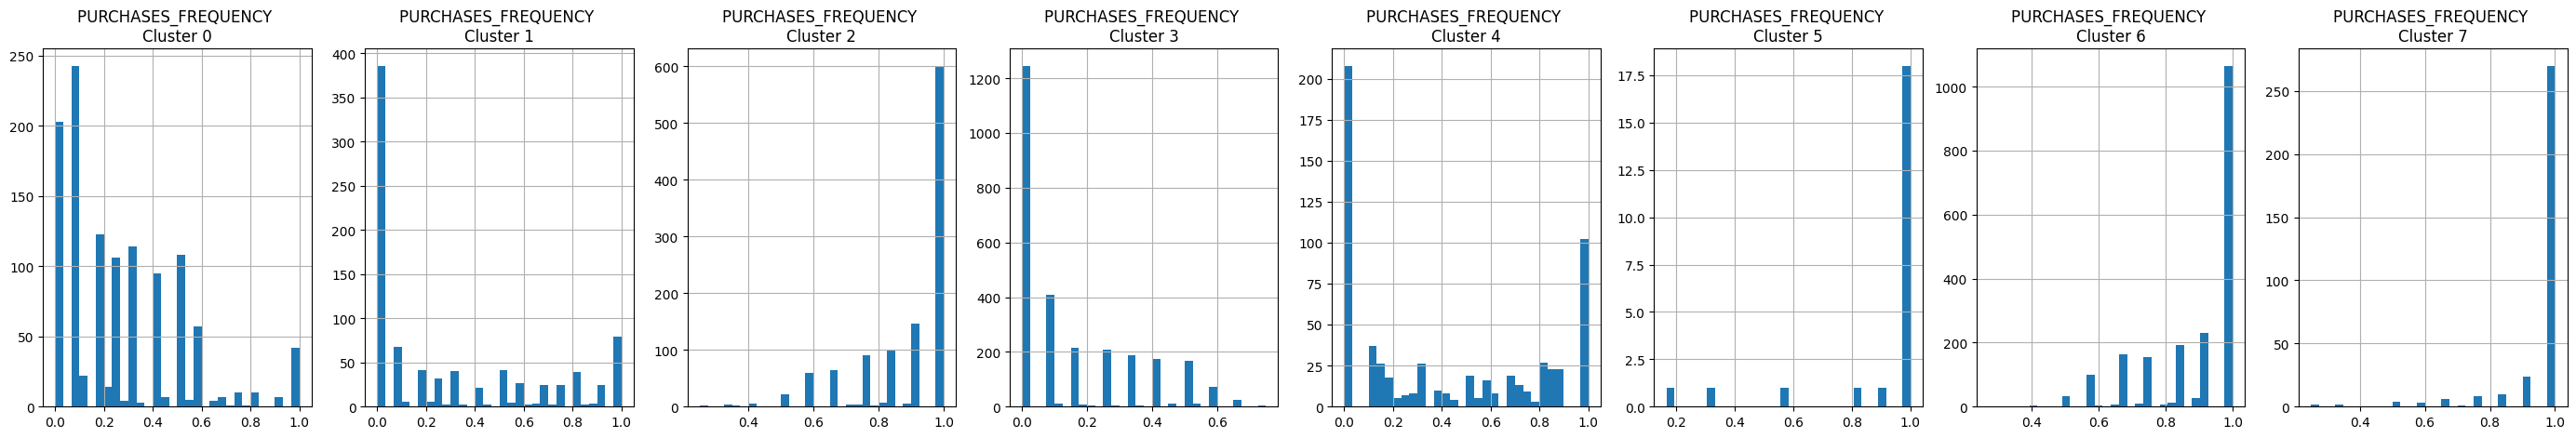

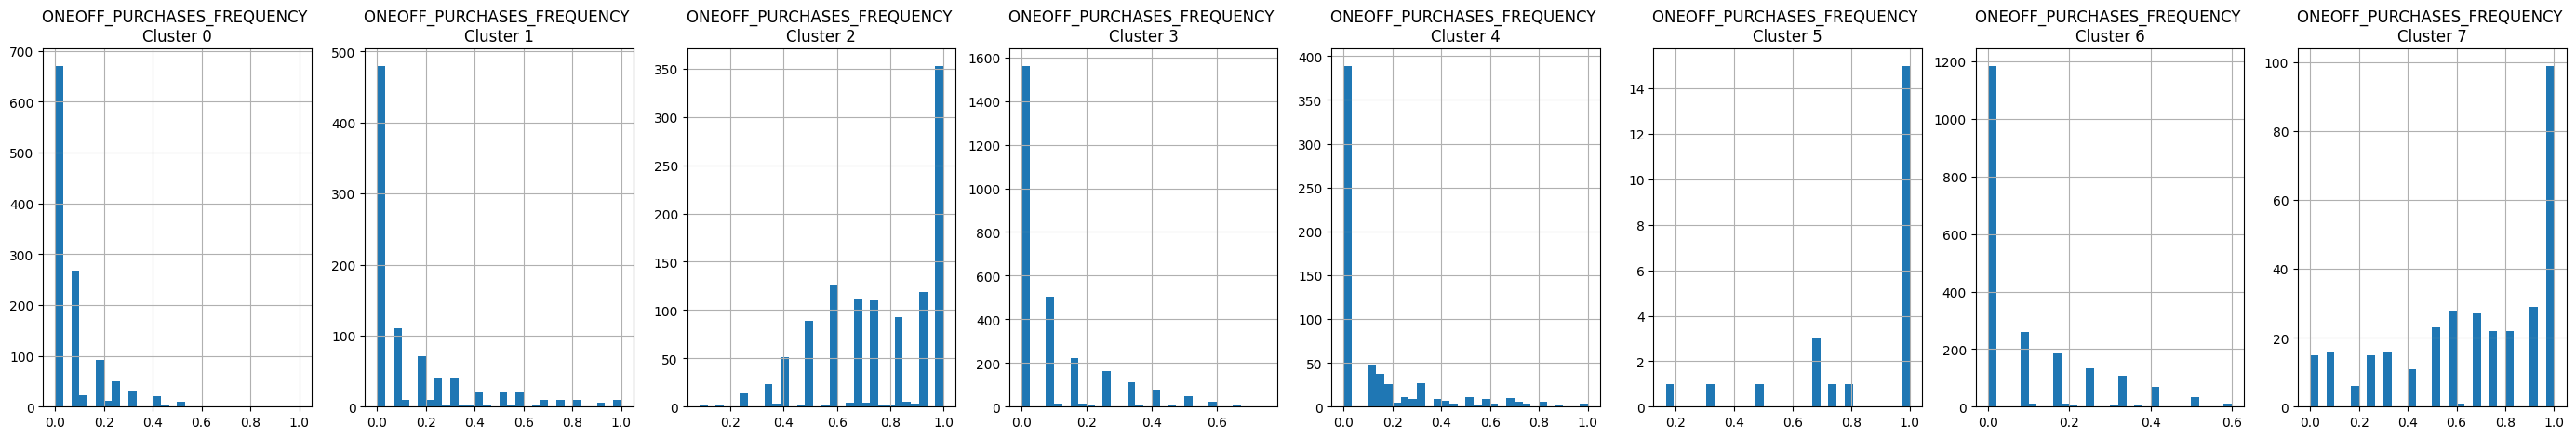

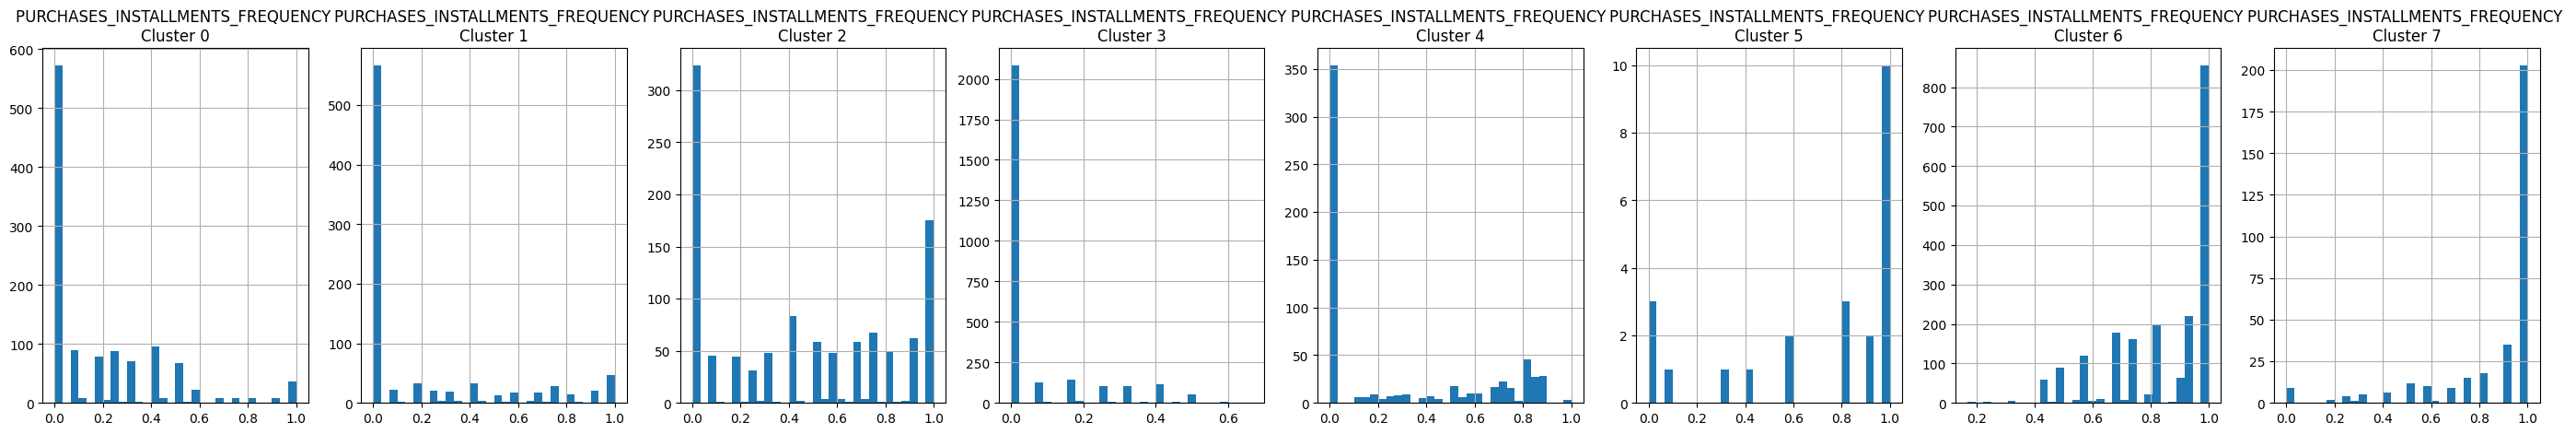

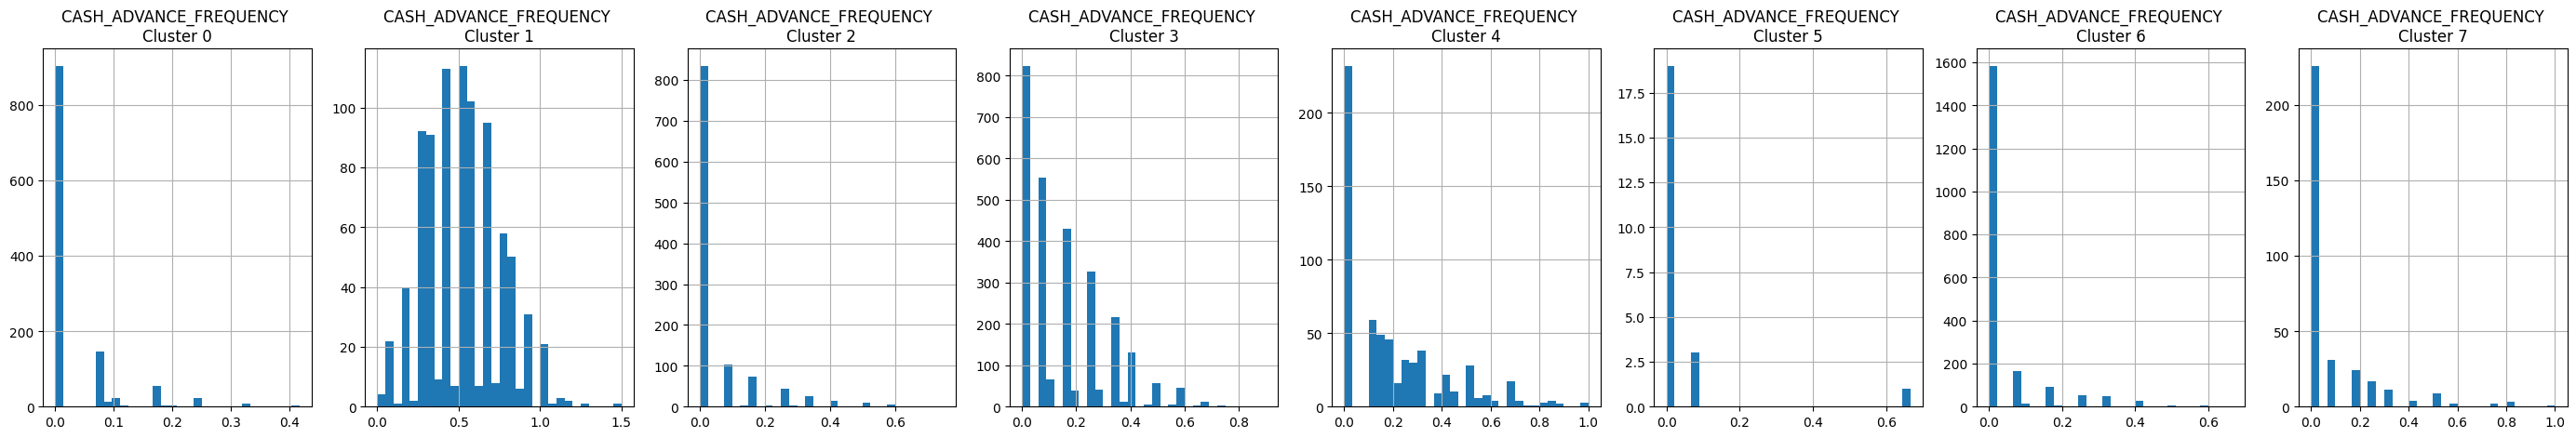

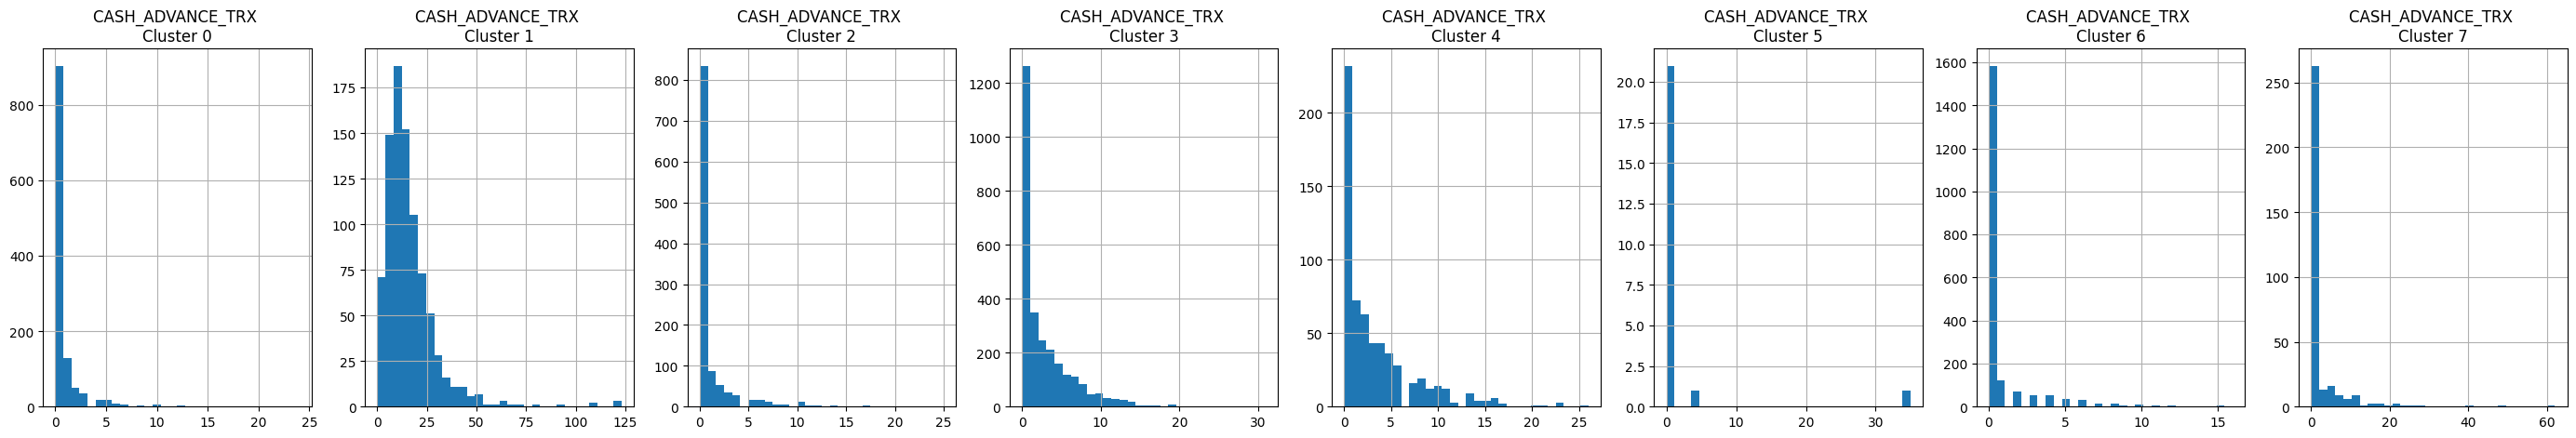

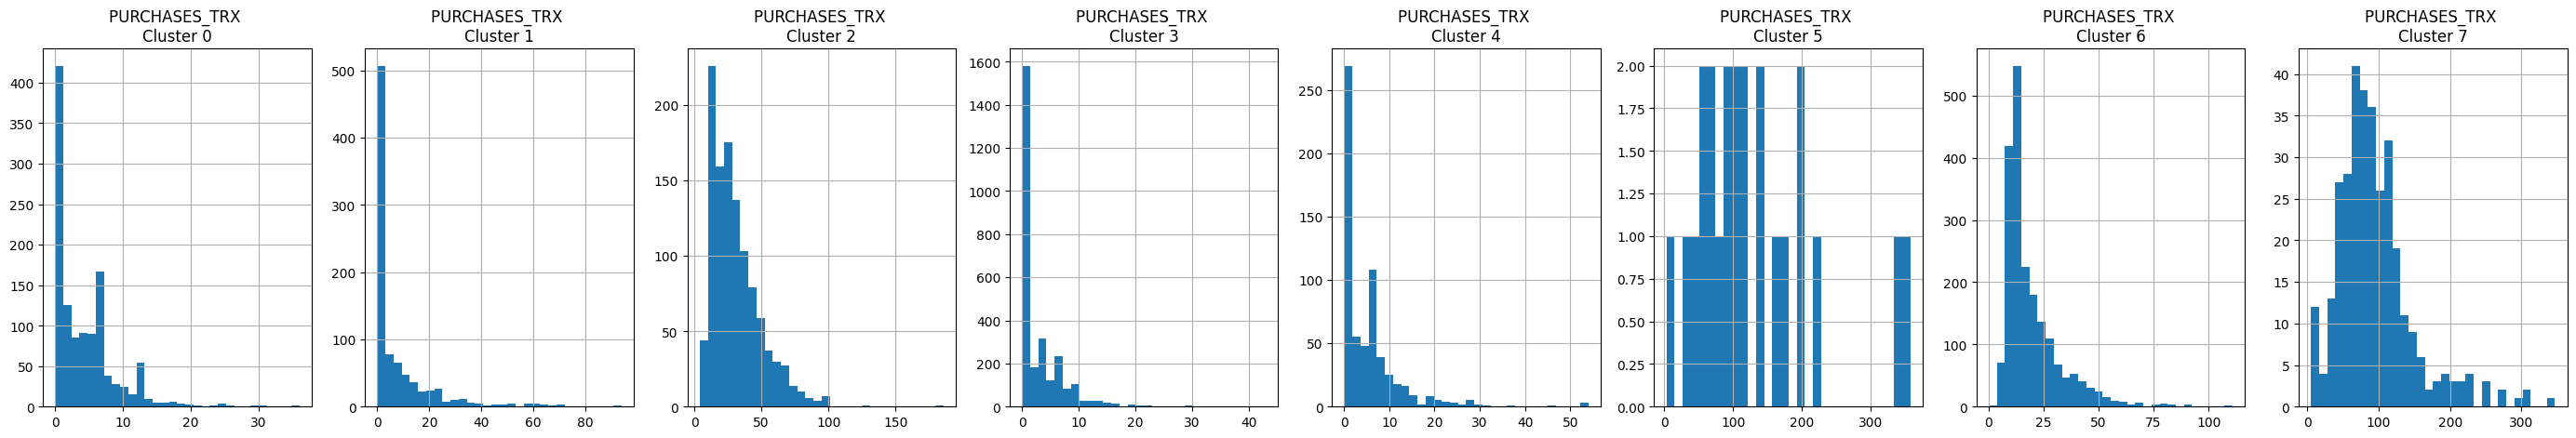

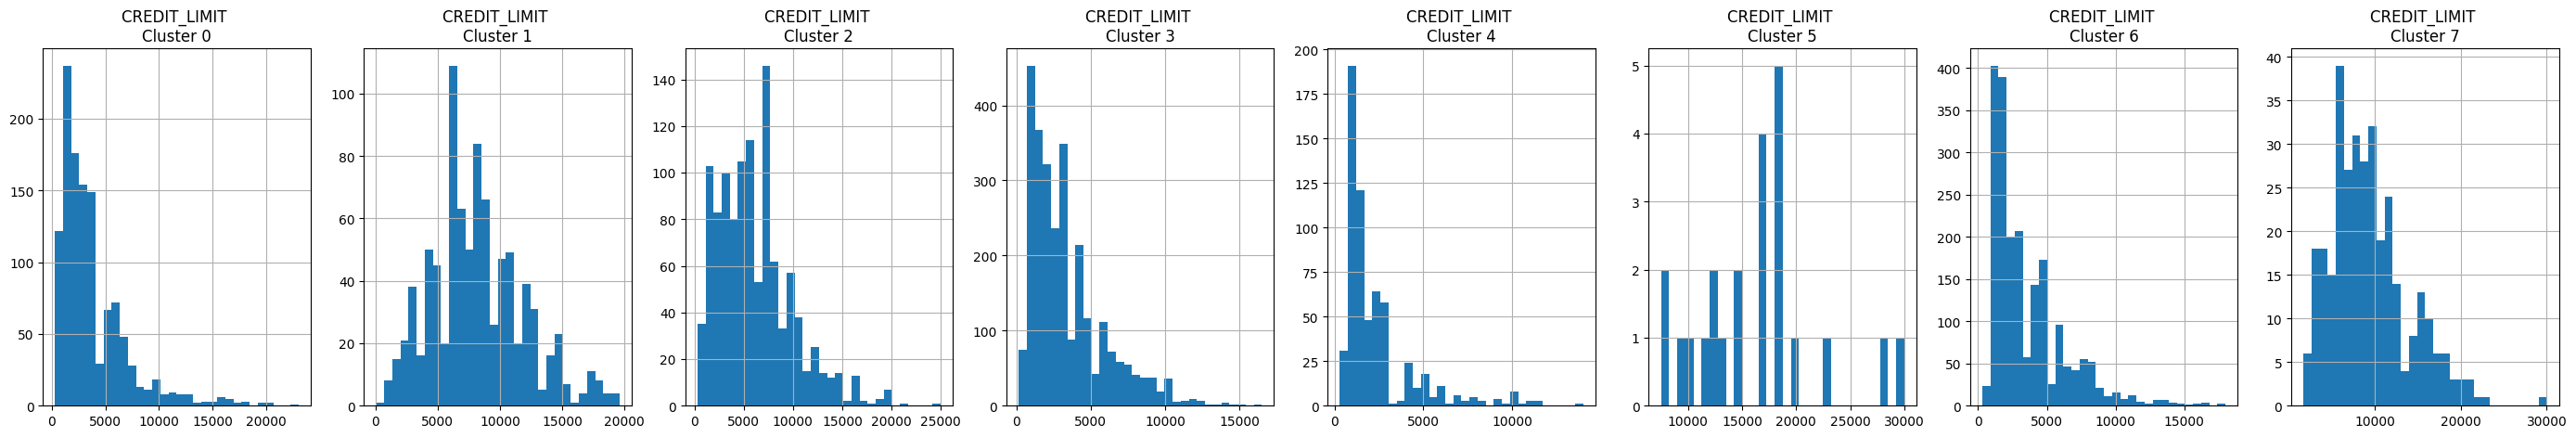

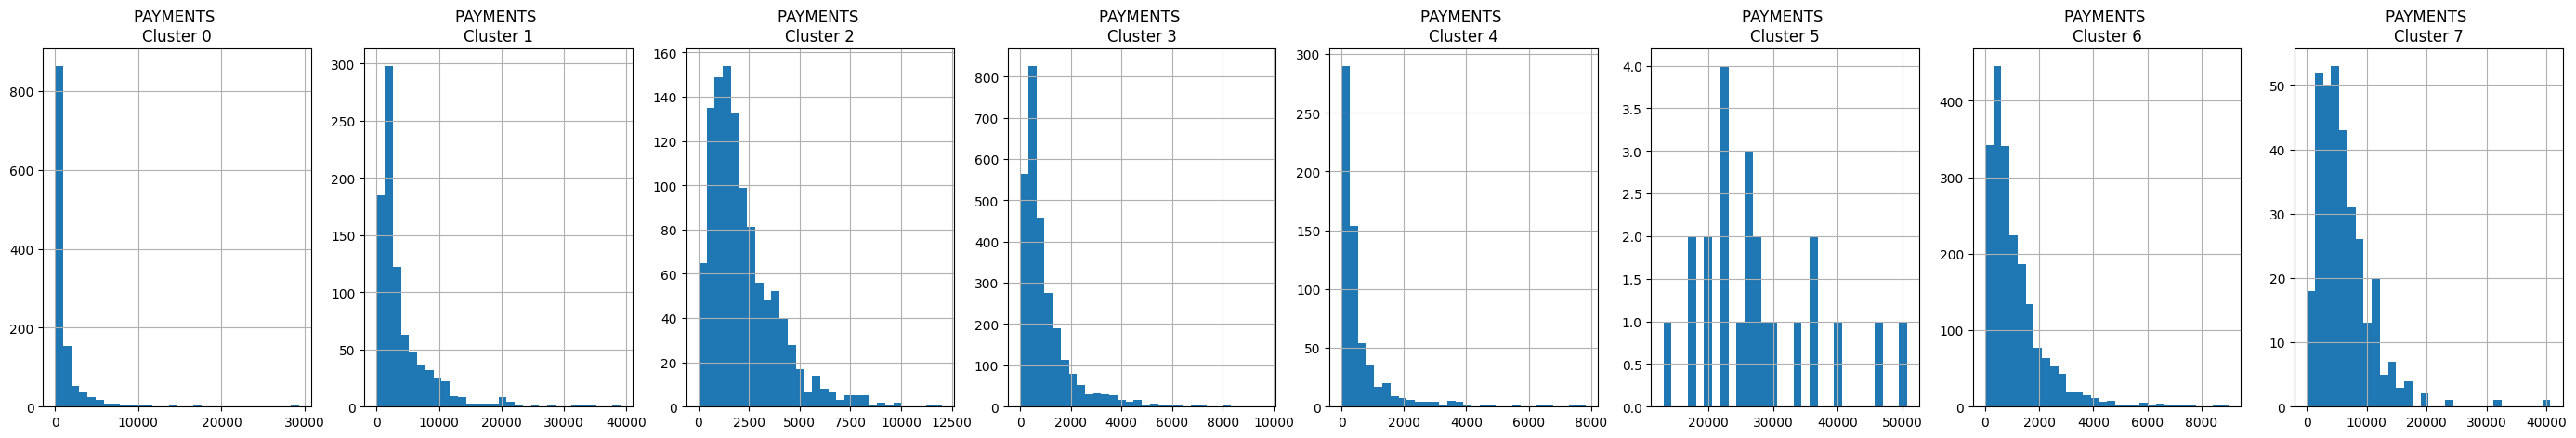

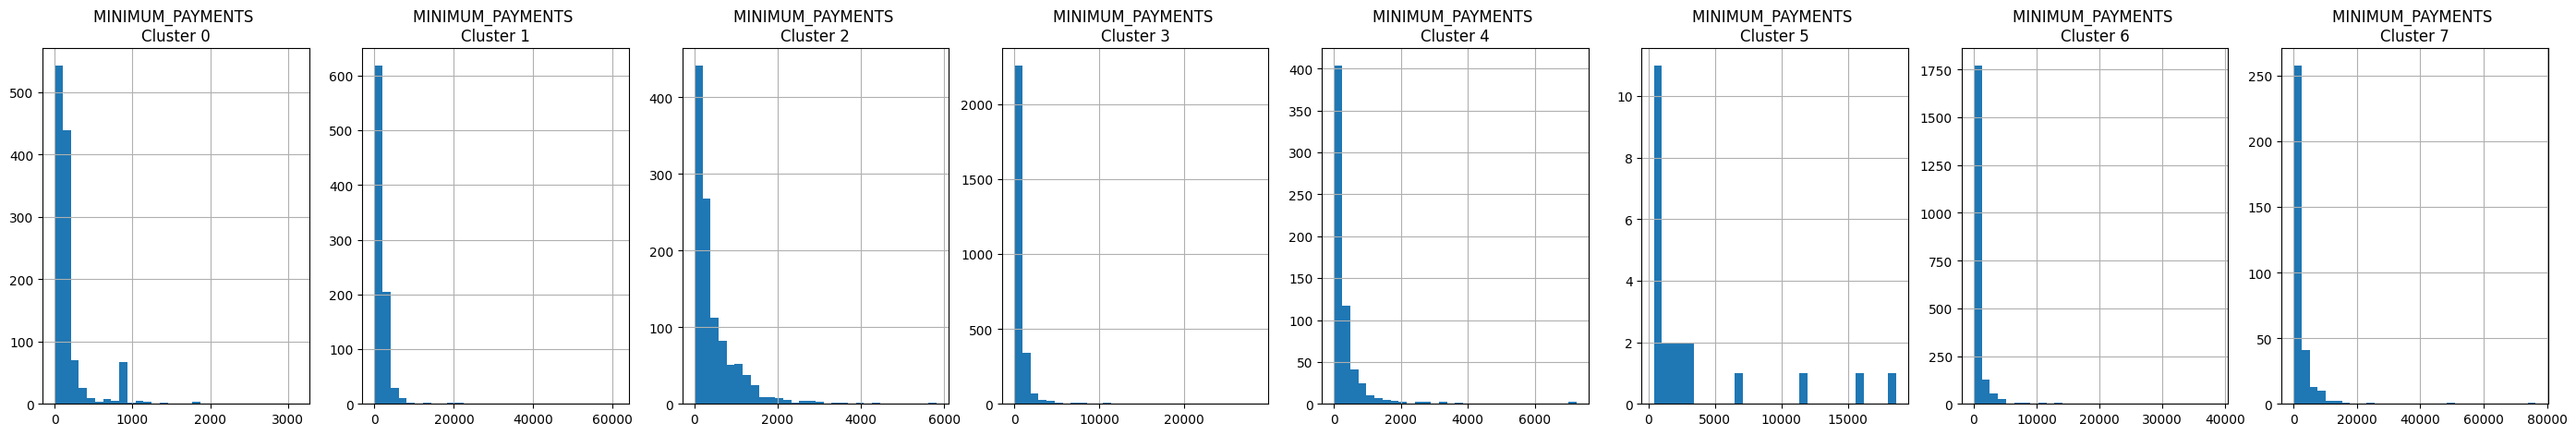

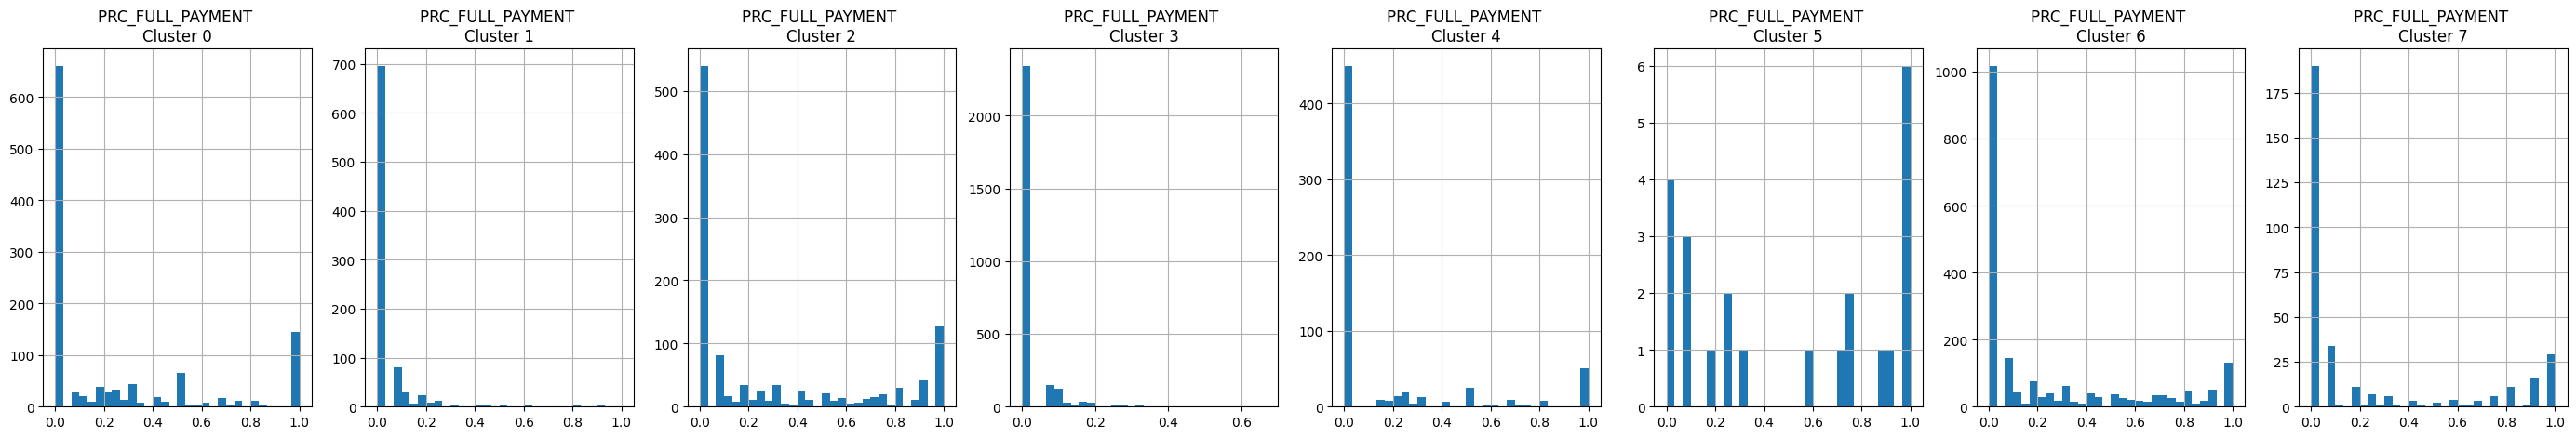

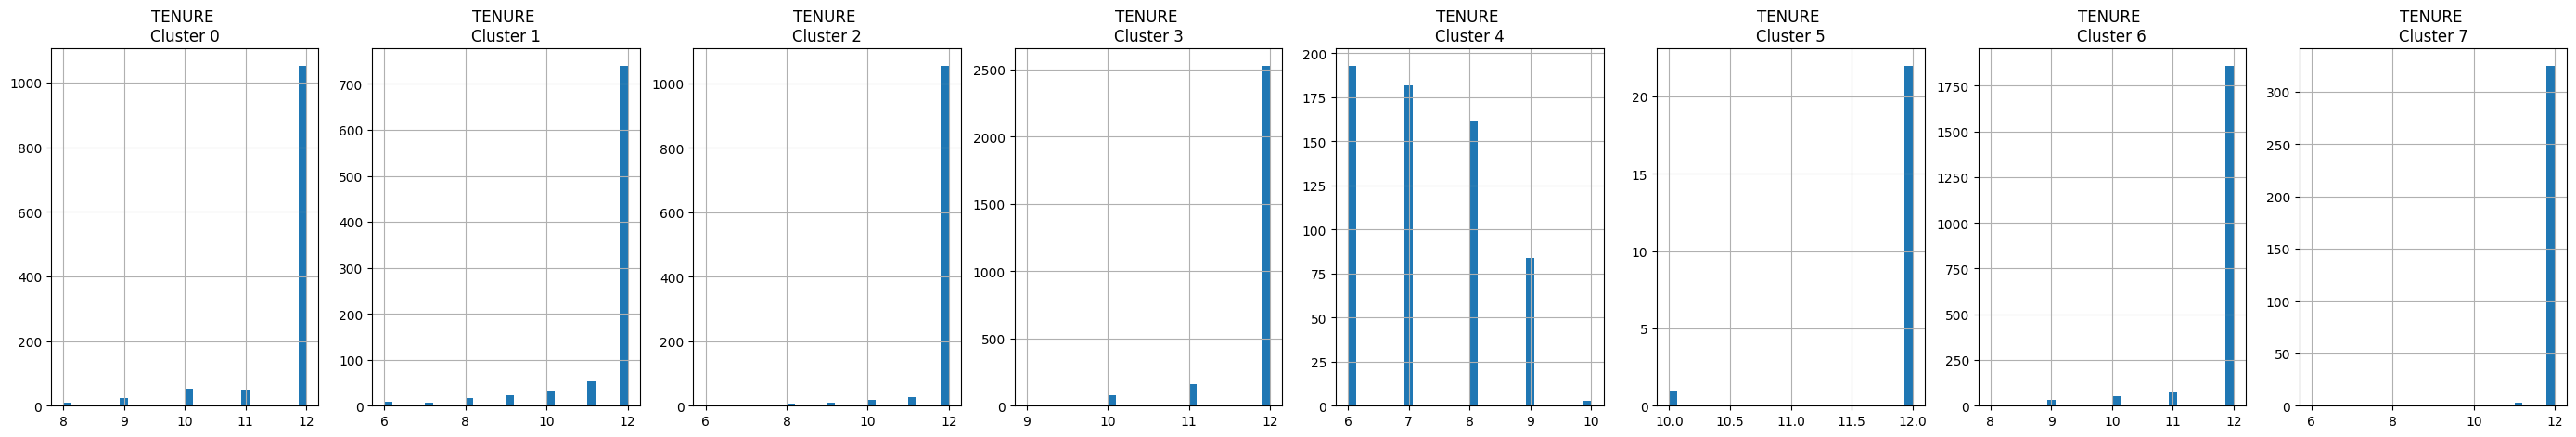

In [50]:
for feature in df.columns:
  plt.figure(figsize=(35,5))
  for centroid in range(8):
    plt.subplot(1,8,centroid+1)
    cluster = df_with_centroids[df_with_centroids.centroid==centroid]
    cluster[feature].hist(bins=30)
    plt.title(f'{feature} \nCluster {centroid}')
plt.show()

In [49]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [df.columns])
cluster_centers


BALANCE BALANCE_FREQUENCY     PURCHASES ONEOFF_PURCHASES  \
0  4.602613e+08          1.105912  1.558916e+09     5.610332e+08   
1  2.187555e+10          1.139512  2.433033e+09     9.170241e+08   
2  5.682192e+09          1.139677  1.009140e+10     4.763986e+09   
3  6.858822e+09          1.139698  1.126384e+09     5.403939e+08   
4  3.746376e+09          1.129709  1.785277e+09     6.613646e+08   
5  2.360645e+10          1.138743  1.274328e+11     6.158533e+10   
6  3.551819e+09          1.138739  4.290985e+09     5.327009e+08   
7  1.657536e+10          1.140601  2.999863e+10     1.033809e+10   

  INSTALLMENTS_PURCHASES  CASH_ADVANCE PURCHASES_FREQUENCY  \
0           1.132243e+08  1.331383e+09            0.730375   
1           1.640385e+08  2.273074e+10            0.735118   
2           3.940066e+08  1.239501e+09            0.830714   
3           4.180683e+07  3.392667e+09            0.711720   
4           1.241828e+08  4.934599e+09            0.753164   
5           4.548817e+09  4.268216e+09            0.832941   
6           6.112240e+08  9.631099e+08            0.830566   
7           2.307197e+09  3.139084e+09            0.841374   

  ONEOFF_PURCHASES_FREQUENCY PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   0.269180                         0.539283   
1                   0.275275                         0.540427   
2                   0.331693                         0.580348   
3                   0.270693                         0.519674   
4                   0.273360                         0.552696   
5                   0.338500                         0.621210   
6                   0.270762                         0.642657   
7                   0.322943                         0.645930   

  CASH_ADVANCE_FREQUENCY CASH_ADVANCE_TRX PURCHASES_TRX  CREDIT_LIMIT  \
0               0.163420        57.029576   3045.465292  5.108587e+10   
1               0.182903       785.456091   5330.023564  1.084300e+11   
2               0.164244        70.616887  19597.784564  8.195045e+10   
3               0.168367       165.904856   2130.349579  4.478317e+10   
4               0.170055       176.624866   3522.976032  3.236920e+10   
5               0.163784       108.436839  79597.363948  2.124003e+11   
6               0.163817        62.431419  12463.783499  4.699998e+10   
7               0.165443       135.777891  58898.551856  1.239423e+11   

       PAYMENTS MINIMUM_PAYMENTS PRC_FULL_PAYMENT     TENURE  
0  9.622400e+09     9.783819e+08         0.218913  48.035013  
1  3.427126e+10     1.164275e+10         0.202031  47.728391  
2  1.848588e+10     2.666683e+09         0.223335  48.215127  
3  8.420136e+09     4.454199e+09         0.200443  48.212754  
4  5.034143e+09     1.779503e+09         0.212185  39.885974  
5  2.326599e+11     1.823787e+10         0.242757  48.265855  
6  9.356165e+09     4.312947e+09         0.219646  48.169420  
7  5.170016e+10     1.232355e+10         0.218320  48.361891

**Revolvers**: High balance, low purchase frequency, heavy cash advance users, low full payment percentage.

**Credit Purchasers**: High purchase frequency, prefer payment installments, pay in full when possible, avoid costly cash advances.

**Active Cash Buyers**: Frequent buyers, pay in full consistently.

**VIP/Prime**: High credit limit, always pay in full.

**Low Tenure**: Short credit history, low balances.

**Transactors**: Low balances, pay in full, minimal interest charges.

**One-Off**: Exceptionally high minimum payments, sporadic large transactions.

**Low Activity**: Rare card usage, small purchase amounts.



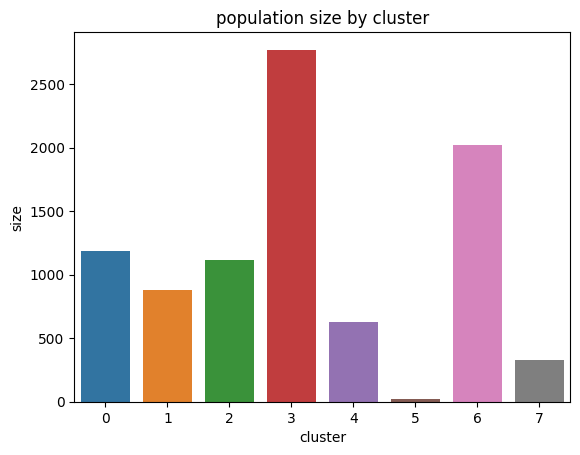

In [54]:
cluster_size = []
for centroid, cluster_df in df_with_centroids.groupby("centroid"):
        cluster_size.append([centroid, len(cluster_df)])
cluster_sizes = pd.DataFrame(cluster_size, columns = ["cluster", "size"])
cluster_sizes.set_index("cluster", drop = True, inplace = True)
sns.barplot(x=cluster_sizes.index, y='size', data=cluster_sizes)
plt.title('population size by cluster')
plt.show()

Clearly the clusters 5 "transactors" is extremely small and primarily represent some kind of exceptions. It may not constitute potential market segments within the current population
The largest cluster represents the customer group with a limited purchase activity and a limited use of their card to make purchases.

**APPLYING PCA(Principle Componenent Analysis)**


---



In [55]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(normalized_df)
principal_components


array([[-1.68382943, -1.07153331],
       [-1.13349198,  2.5098874 ],
       [ 0.96925179, -0.38372528],
       ...,
       [-0.92933072, -1.80749463],
       [-2.33804627, -0.65283131],
       [-0.55830666, -0.40035656]])

In [56]:
principal_components.shape

(8950, 2)

In [57]:
pca_df = pd.DataFrame(principal_components, columns=['pca1', 'pca2'])
pca_df.head()

pca1      pca2
0 -1.683829 -1.071533
1 -1.133492  2.509887
2  0.969252 -0.383725
3 -0.896865 -0.017537
4 -1.600115 -0.683147

In [58]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':labels})],axis=1)
pca_df.head()

pca1      pca2  cluster
0 -1.683829 -1.071533        3
1 -1.133492  2.509887        0
2  0.969252 -0.383725        6
3 -0.896865 -0.017537        3
4 -1.600115 -0.683147        3

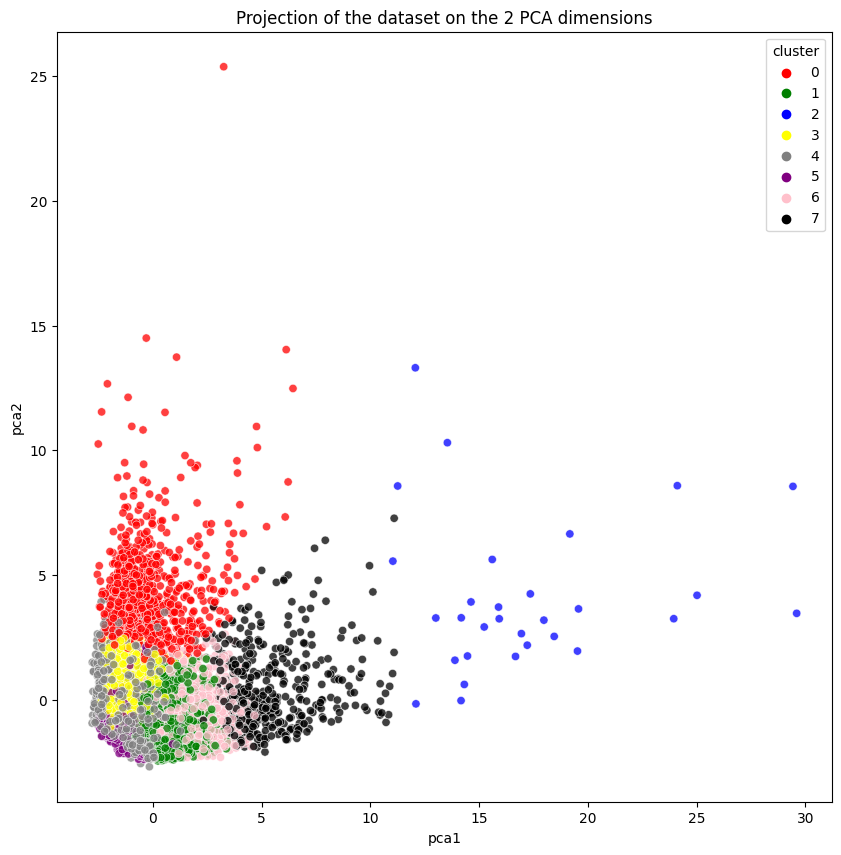

In [59]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='pca1', y='pca2',hue = 'cluster', data = pca_df, palette=['red','green','blue','yellow','gray','purple','pink','black'], alpha=0.75)
plt.title('Projection of the dataset on the 2 PCA dimensions')
plt.show()

In [60]:
pca.components_

array([[ 0.10182754,  0.12051556,  0.41154019,  0.34630897,  0.33675467,
        -0.02274284,  0.32120729,  0.29444842,  0.27448574, -0.08851107,
        -0.04806831,  0.3905793 ,  0.21190945,  0.26652628,  0.06395983,
         0.13178809,  0.08109729],
       [ 0.403783  ,  0.13131879,  0.03988966,  0.06179904, -0.01927643,
         0.43908165, -0.1911793 , -0.01867454, -0.17887091,  0.43420912,
         0.4197232 , -0.02028773,  0.23795614,  0.25675506,  0.16865448,
        -0.19005722, -0.00423521]])

In [61]:
pca.explained_variance_ratio_

array([0.27299243, 0.20311671])

**AUTOENCODERS FOR DIMENSIONALITY REDUCTION**

---

In [62]:
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform # Xavier's initialization
from keras.optimizers import SGD                         # Stochastic Gradient Descent

In [63]:
input_df = Input(shape=(17,))  # The 17 features of our dataset
# Encoder
x = Dense(units=7, activation='relu')(input_df)
x = Dense(units=500, activation='relu', kernel_initializer='glorot_uniform')(x)
x = Dense(units=500, activation='relu', kernel_initializer='glorot_uniform')(x)
x = Dense(units=2000, activation='relu', kernel_initializer='glorot_uniform')(x)
# Bottleneck
encoded = Dense(units=10, activation='relu', kernel_initializer='glorot_uniform')(x)
# Decoder
x = Dense(units=2000, activation='relu', kernel_initializer='glorot_uniform')(encoded)
x = Dense(units=500, activation='relu', kernel_initializer='glorot_uniform')(x)
# we reconstruct the same number of features as the input
decoded = Dense(units=17, kernel_initializer='glorot_uniform')(x)

# Autoencoder
autoencoder = Model(input_df, decoded)
# Encoder
encoder = Model(input_df, encoded)

autoencoder.compile(optimizer='adam', loss='mean_squared_error')

In [64]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 17)]              0         
                                                                 
 dense (Dense)               (None, 7)                 126       
                                                                 
 dense_1 (Dense)             (None, 500)               4000      
                                                                 
 dense_2 (Dense)             (None, 500)               250500    
                                                                 
 dense_3 (Dense)             (None, 2000)              1002000   
                                                                 
 dense_4 (Dense)             (None, 10)                20010     
                                                                 
 dense_5 (Dense)             (None, 2000)              22000 

In [65]:
normalized_df.shape

(8950, 17)

In [ ]:
autoencoder.fit(x= normalized_df, y= normalized_df, batch_size=128, epochs=25,verbose=1)

Epoch 1/25
70/70 [==============================] - 5s 41ms/step - loss: 0.5737
Epoch 2/25
70/70 [==============================] - 2s 35ms/step - loss: 0.3149
Epoch 3/25
70/70 [==============================] - 2s 35ms/step - loss: 0.2507
Epoch 4/25
70/70 [==============================] - 3s 43ms/step - loss: 0.2096
Epoch 5/25
70/70 [==============================] - 3s 39ms/step - loss: 0.1844
Epoch 6/25
70/70 [==============================] - 2s 34ms/step - loss: 0.1722
Epoch 7/25
70/70 [==============================] - 2s 34ms/step - loss: 0.1511
Epoch 8/25
70/70 [==============================] - 4s 52ms/step - loss: 0.1423
Epoch 9/25
70/70 [==============================] - 5s 77ms/step - loss: 0.1317
Epoch 10/25
70/70 [==============================] - 3s 44ms/step - loss: 0.1256
Epoch 11/25
70/70 [==============================] - 2s 34ms/step - loss: 0.1125
Epoch 12/25
70/70 [==============================] - 2s 34ms/step - loss: 0.1095
Epoch 13/25
70/70 [==================

In [67]:
pred = encoder.predict(normalized_df)
pred.shape

280/280 [==============================] - 1s 4ms/step


(8950, 10)

The dataset is reduced from 17 features (or dimensions) to 10 using trained autoencoder which should retain as much information as possible in the process

**APPLYING K-MEANS**

---

In [68]:
wcss_values_autoencoder = []
for i in range(1,20):
  kmeans= KMeans(n_clusters= i)
  kmeans.fit(pred)
  wcss_values_autoencoder.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

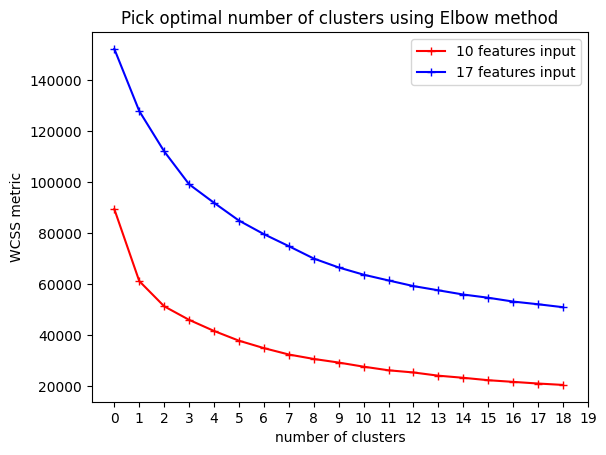

In [69]:
plt.plot(wcss_values_autoencoder, 'r+-', label='10 features input')
plt.plot(wcss_values, 'b+-', label='17 features input')
plt.xlabel('number of clusters')
plt.ylabel('WCSS metric')
plt.title('Pick optimal number of clusters using Elbow method')
plt.xticks(ticks=range(0,20))
plt.legend()
plt.show()

In [ ]:
# using n=5 clusters(optimal)

In [70]:
kmeans= KMeans(5)
kmeans.fit(pred)
centroids = kmeans.cluster_centers_
clusters = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [71]:
centroids.shape

(5, 10)

In [72]:
clusters.shape

(8950,)

In [73]:
set(clusters)

{0, 1, 2, 3, 4}

In [74]:
df_with_labels = pd.concat([df, pd.DataFrame({'cluster':clusters})], axis=1 )
df_with_labels.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  cluster  
0   201.802084        139.509787          0.000000      12        0  
1  4103.032597       1072.340217          0.222222      12        0  
2   622.066742        627.284787          0.000000      12        4  
3     0.000000          0.000000          0.000000      12        0  
4   678.334763        244.791237          0.000000      12        0

In [75]:
print('Number of samples in:')
for cluster, df_cluster in df_with_labels.groupby('cluster'):
  print('cluster', cluster, '->',len(df_cluster))

Number of samples in:
cluster 0 -> 5811
cluster 1 -> 546
cluster 2 -> 1674
cluster 3 -> 59
cluster 4 -> 860


**APPLYING PCA TO ENCODED DATASET**

---

In [76]:
pca = PCA(2)
principal_components = pca.fit_transform(pred)
pca_df = pd.DataFrame(principal_components,columns=['pca_1', 'pca_2'])
pca_df.head()

pca_1     pca_2
0 -1.172447 -0.461489
1 -0.106050 -0.855104
2  0.574257  0.827045
3 -0.214300 -0.140210
4 -1.440985 -0.390182

In [77]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':clusters})], axis=1)
pca_df.head()

pca_1     pca_2  cluster
0 -1.172447 -0.461489        0
1 -0.106050 -0.855104        0
2  0.574257  0.827045        4
3 -0.214300 -0.140210        0
4 -1.440985 -0.390182        0

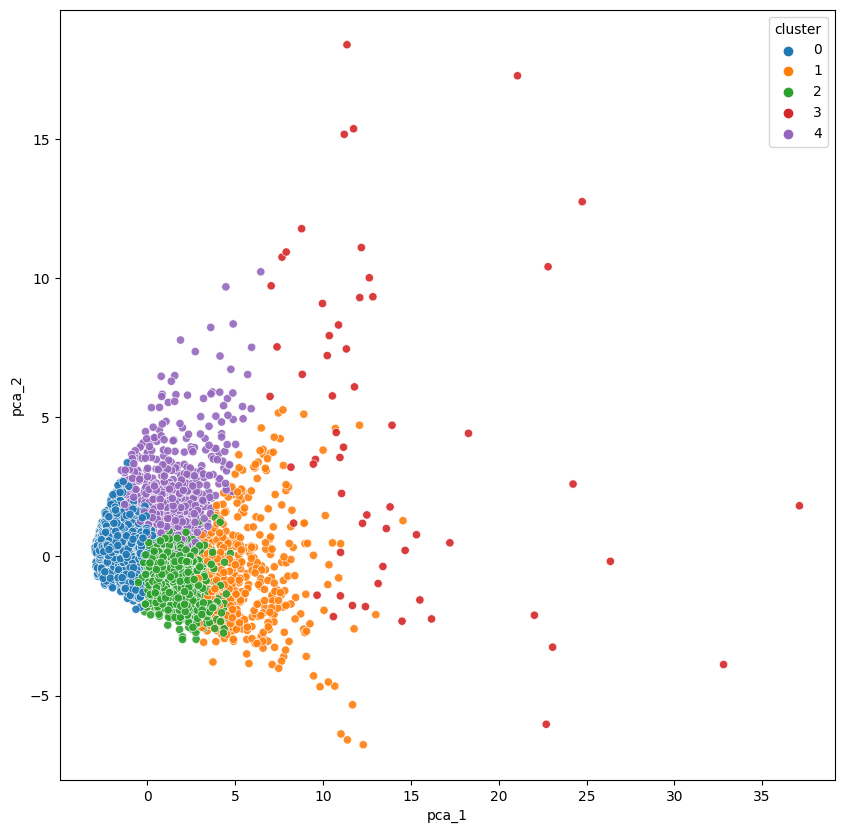

In [78]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='pca_1', y='pca_2', data=pca_df, hue='cluster', palette='tab10', alpha=0.9)  # or 'Spectral' color palette
plt.show()

In [79]:
pca.explained_variance_ratio_

array([0.5535175 , 0.16397265], dtype=float32)

In [81]:
print(round(pca.explained_variance_ratio_.sum()*100,0))

72.0
